# Loan Eligibility Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

C:\Users\Intel\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Importing Dataset
train = pd.read_csv("C:\\Users\\Intel\\Downloads\\capstone train.csv")
train.head()



Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [3]:
train.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [4]:
train.tail()

Loan_ID  Gender Married Dependents Education Self_Employed  \
609  LP002978  Female      No          0  Graduate            No   
610  LP002979    Male     Yes         3+  Graduate            No   
611  LP002983    Male     Yes          1  Graduate            No   
612  LP002984    Male     Yes          2  Graduate            No   
613  LP002990  Female      No          0  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N

In [5]:
test = pd.read_csv("C:\\Users\\Intel\\Downloads\\capstone test.csv")
test.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN         Urban  
4             1.0         Urban

In [6]:
test.tail()

Loan_ID Gender Married Dependents     Education Self_Employed  \
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
362             4009               1777       113.0             360.0   
363             4158                709       115.0             360.0   
364             3250               1993       126.0             360.0   
365             5000               2393       158.0             360.0   
366             9200                  0        98.0             180.0   

     Credit_History Property_Area  
362             1.0         Urban  
363             1.0         Urban  
364             NaN     Semiurban  
365             1.0         Rural  
366             1.0         Rural

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
train.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [9]:
train_original=train.copy()
test_original=test.copy()

In [10]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [12]:
train.shape

(614, 13)

In [13]:
test.shape

(367, 12)

In [14]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [15]:
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<AxesSubplot:>

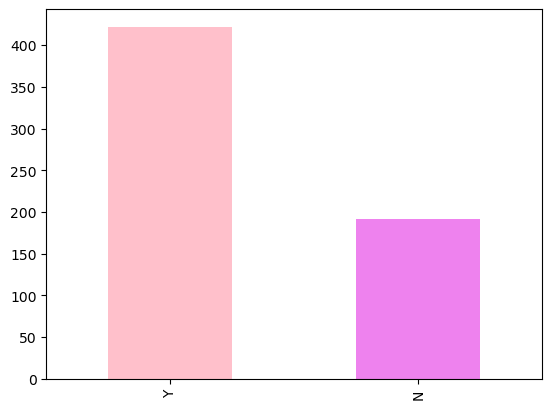

In [16]:
train['Loan_Status'].value_counts(normalize=True)
train['Loan_Status'].value_counts().plot.bar(color=['Pink','Violet'])

In [17]:
categorical_data = [i for i in train.columns if train[i].dtype=="object"]
categorical_data

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [18]:
numerical_data = [i for i in train.columns if train[i].dtype!="object"]
numerical_data

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [19]:
discrete_numerical_data = [i for i in numerical_data if len(train[i].unique())<16]
discrete_numerical_data

['Loan_Amount_Term', 'Credit_History']

In [20]:
continuous_numerical_data = [i for i in numerical_data if len(train[i].unique())>=16]
continuous_numerical_data

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Data Visualization

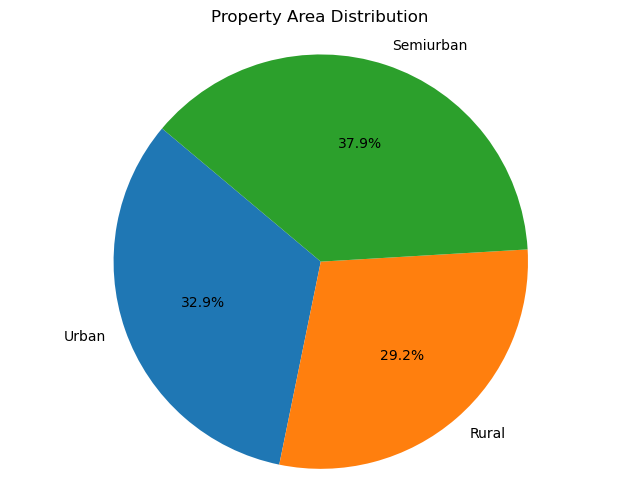

In [21]:
property_area_counts = {'Urban': 202, 'Rural': 179, 'Semiurban': 233}

# Pie chart
labels = property_area_counts.keys()
sizes = property_area_counts.values()

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Property Area Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

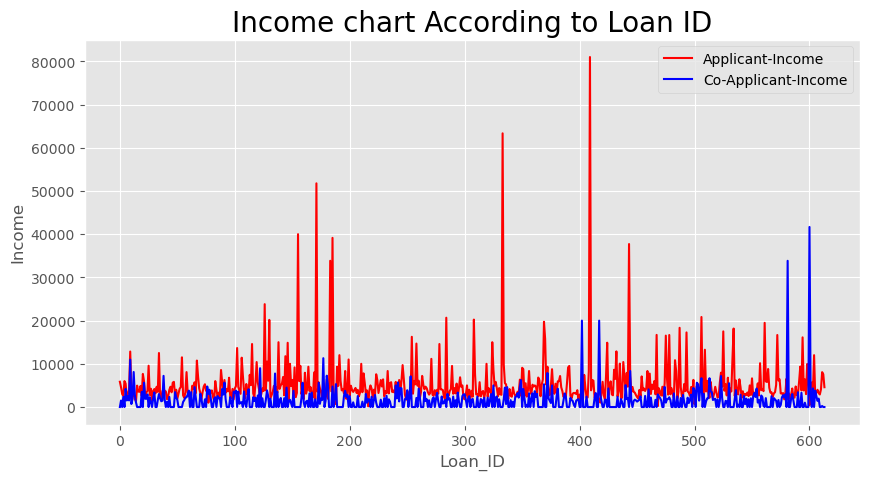

In [23]:
from matplotlib import style
style.use("ggplot")
plt.figure(figsize=(10,5))
plt.plot(train.index,train['ApplicantIncome'],color="r",label="Applicant-Income")
plt.plot(train.index,train['CoapplicantIncome'],color="b",label="Co-Applicant-Income")
plt.grid(color="white")
plt.xlabel("Loan_ID")
plt.ylabel("Income")
plt.title("Income chart According to Loan ID",fontsize=20)
plt.legend()
plt.show()

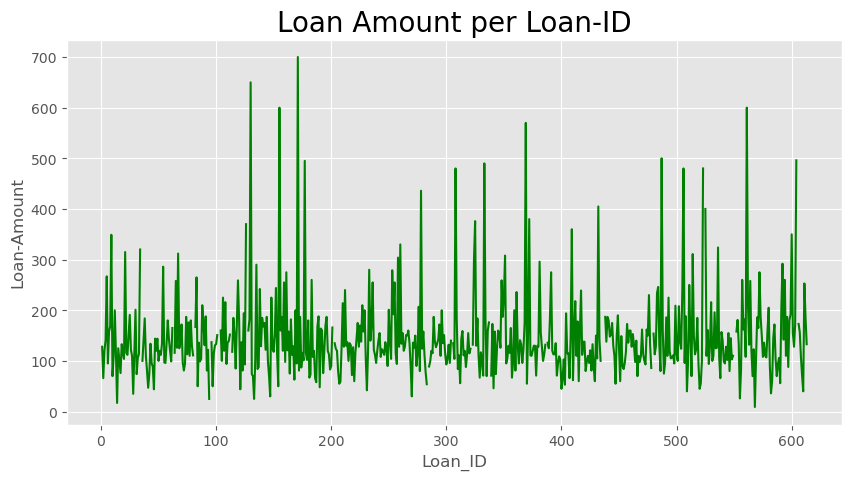

In [24]:
plt.figure(figsize=(10,5))
plt.plot(train.index,train['LoanAmount'],color="g")
plt.xlabel("Loan_ID")
plt.ylabel("Loan-Amount")
plt.title("Loan Amount per Loan-ID",fontsize=(20))
plt.show()

<AxesSubplot:>

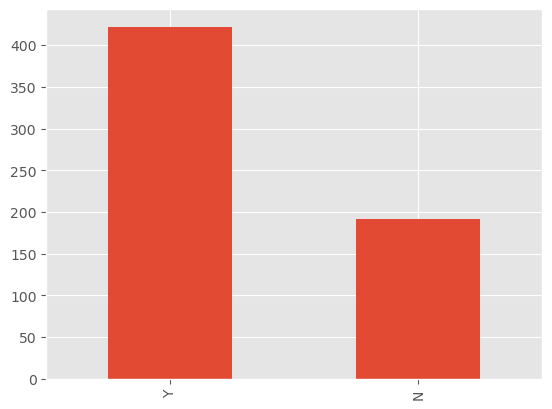

In [25]:
train['Loan_Status'].value_counts().plot.bar()

# Independent Variable(Categorical)


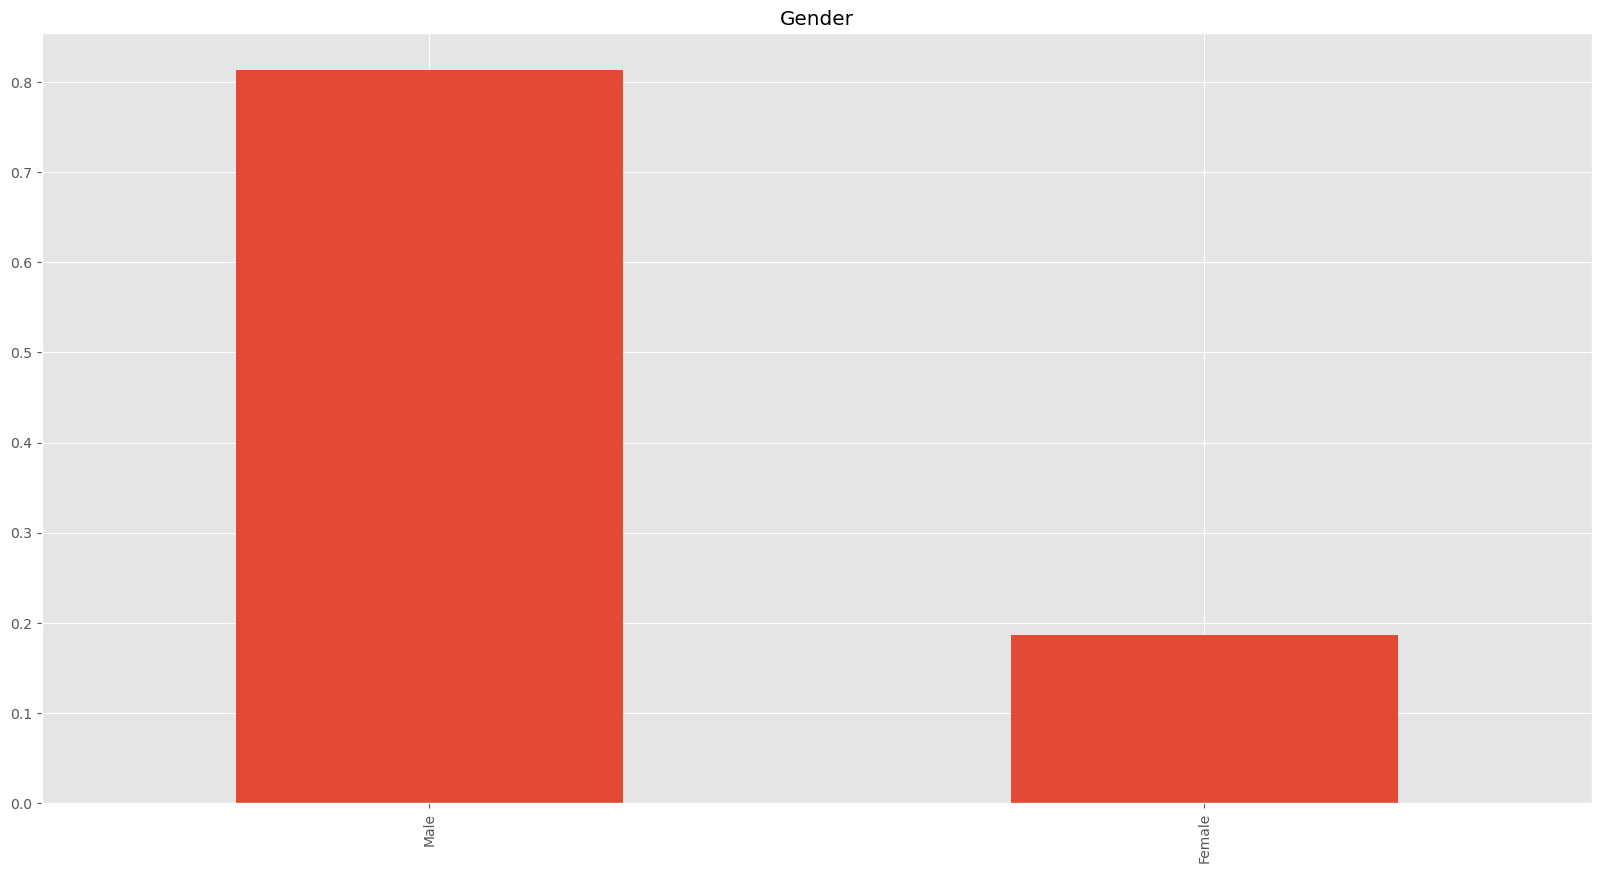

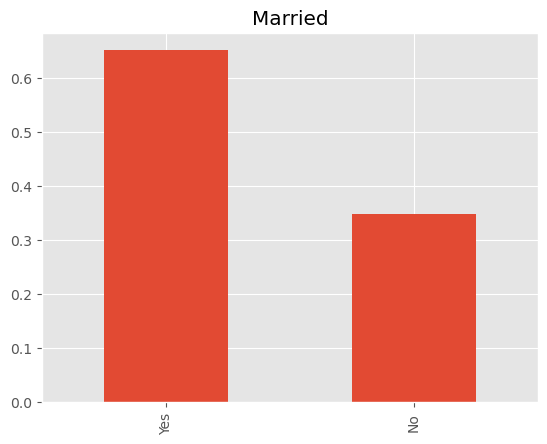

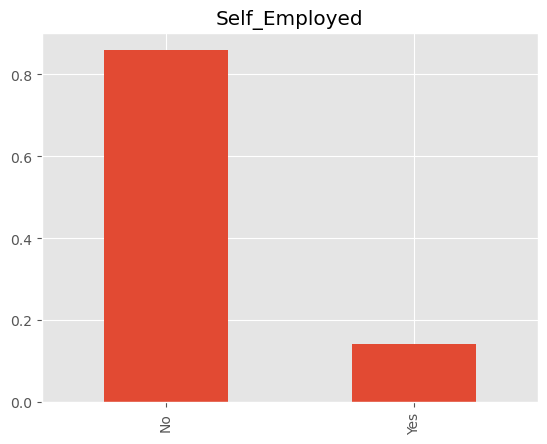

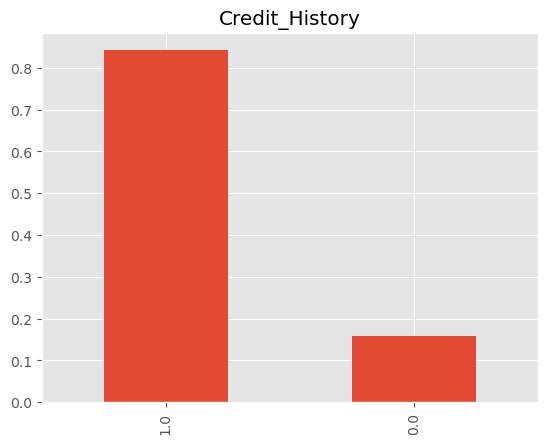

In [26]:
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')
plt.show()
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

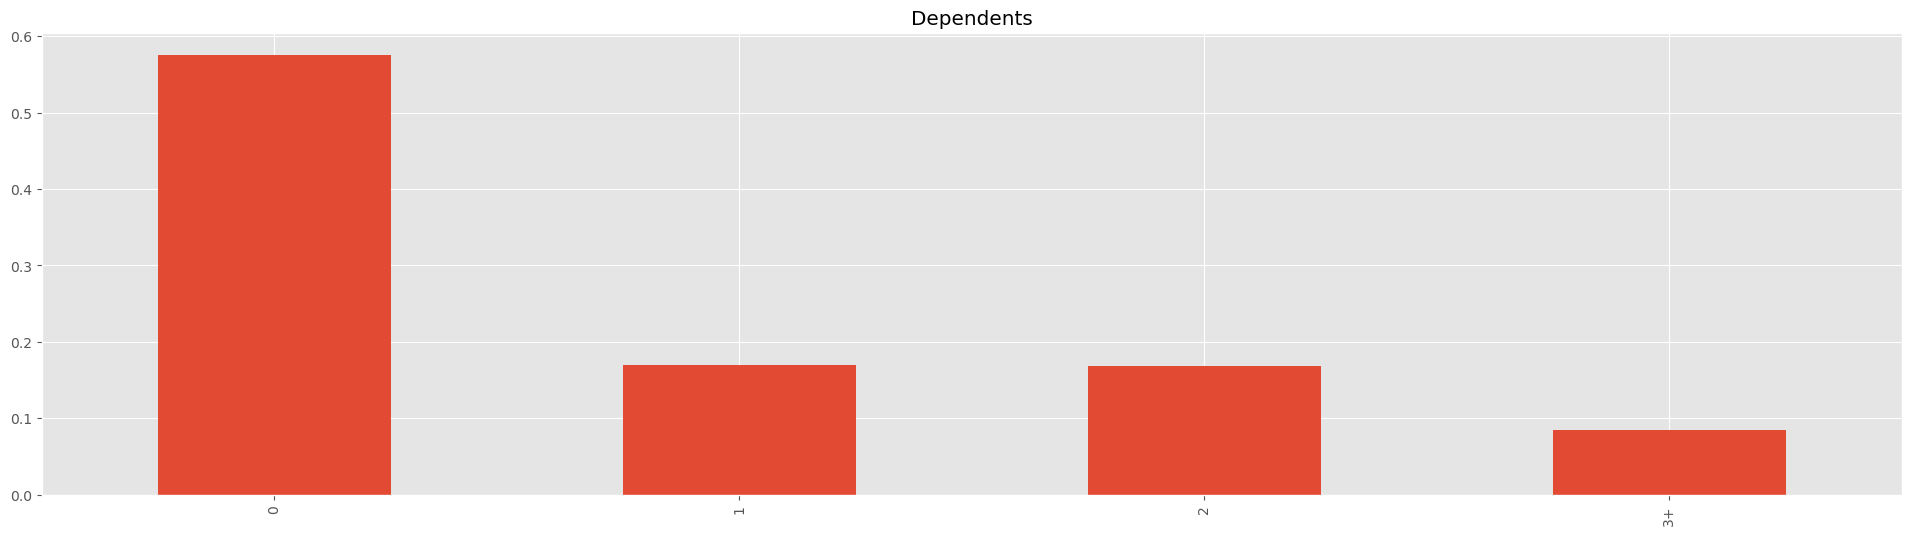

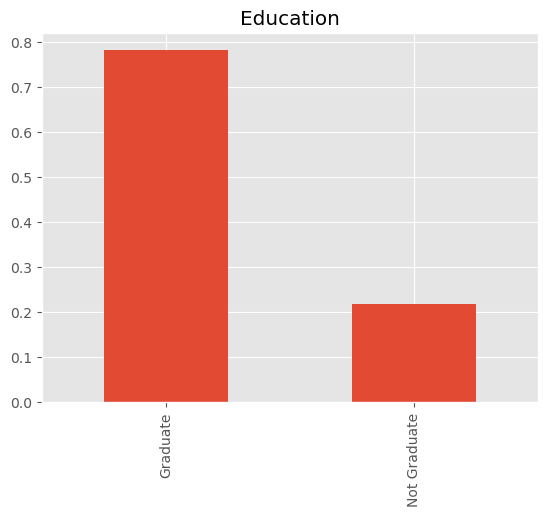

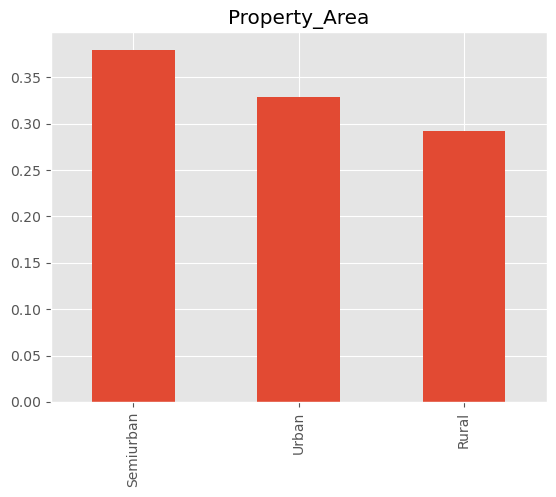

In [27]:
#Independent Variable(Ordinal)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.show()
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

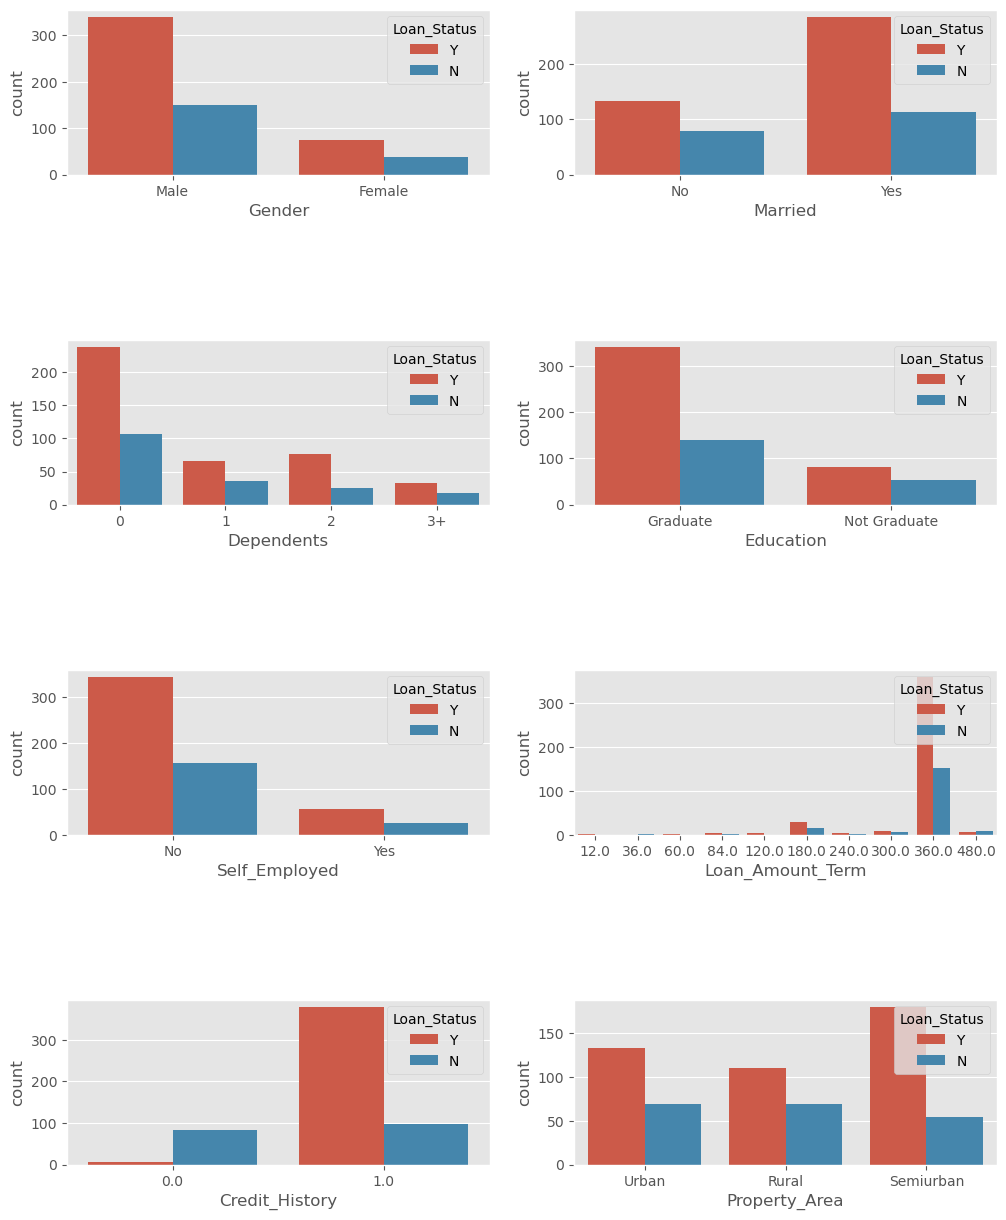

In [28]:
#Categorial variable VsTarget
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
                        'Loan_Amount_Term','Credit_History','Property_Area']
numerical_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

#categorical features
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_features):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train,hue='Loan_Status',ax=axes[row,col])

plt.subplots_adjust(hspace=1)

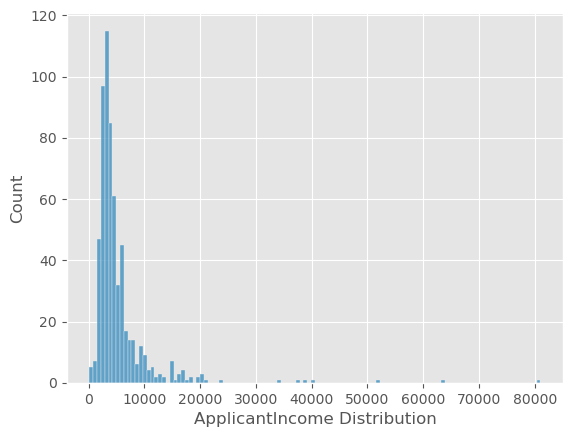

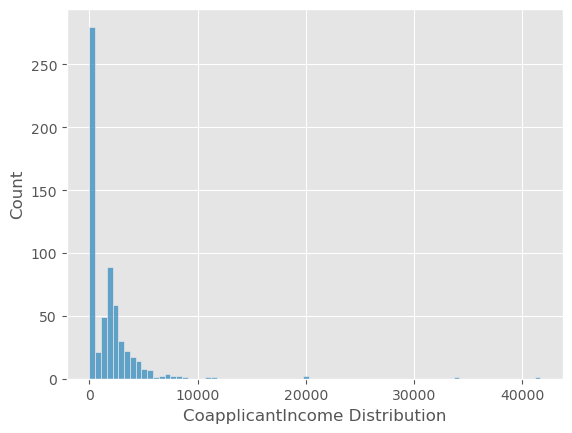

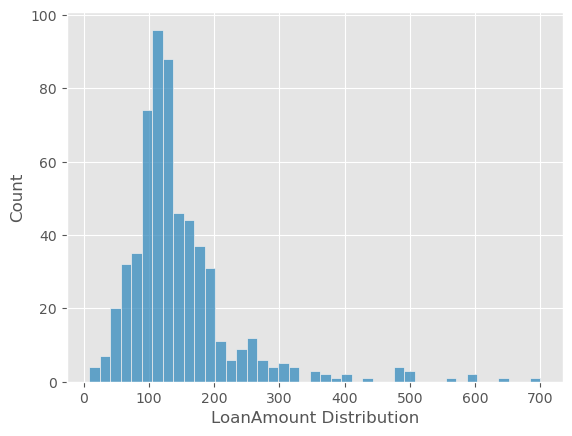

In [29]:
# For Continuous Numerical Data
for i in continuous_numerical_data:
    sns.histplot(train[i])
    plt.xlabel(i+" Distribution")
    plt.show()

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


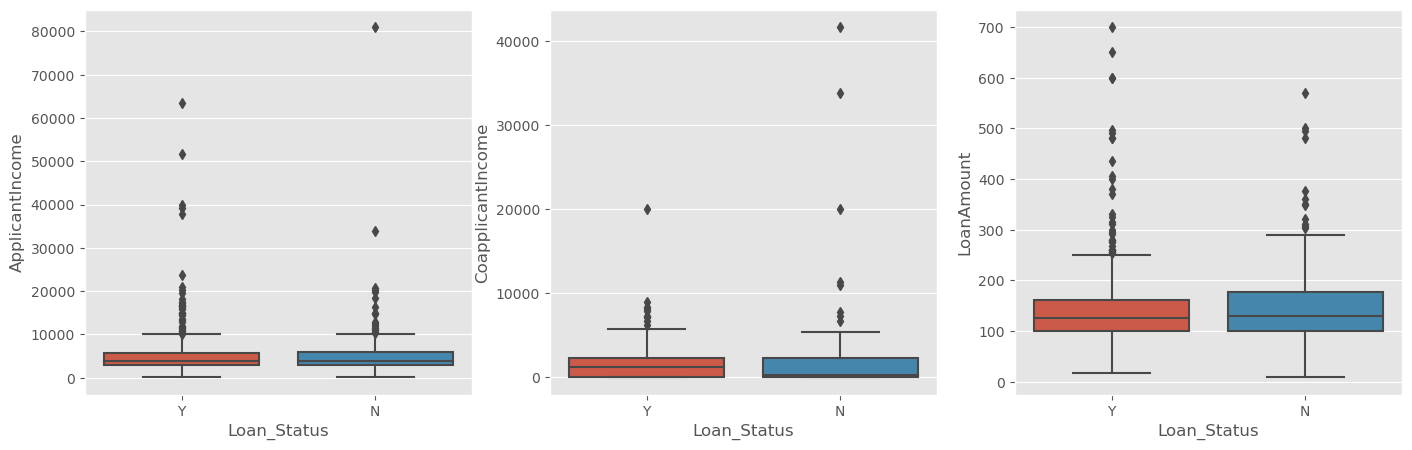

In [30]:
#numerical features
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_features):
    sns.boxplot(y=cat_col,data=train,x='Loan_Status',ax=axes[idx])

print(train[numerical_features].describe())
plt.subplots_adjust(hspace=1)

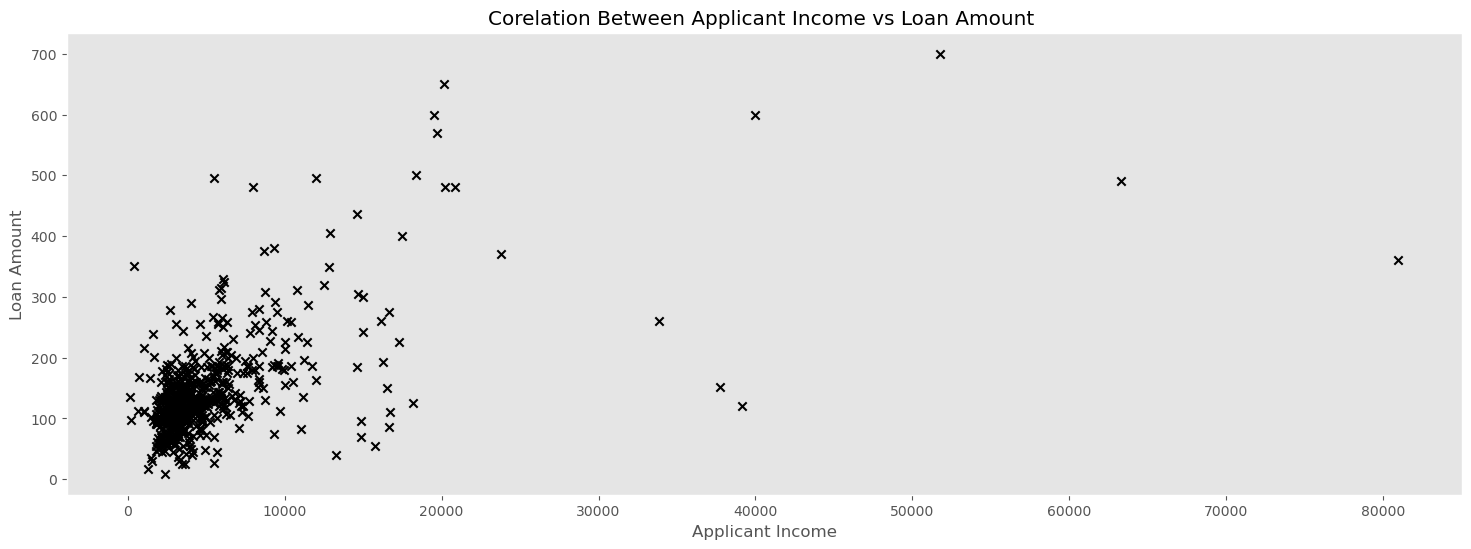

In [31]:
plt.figure(figsize=(18, 6))
plt.title("Corelation Between Applicant Income vs Loan Amount ")

plt.grid()
plt.scatter(train['ApplicantIncome'], train['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

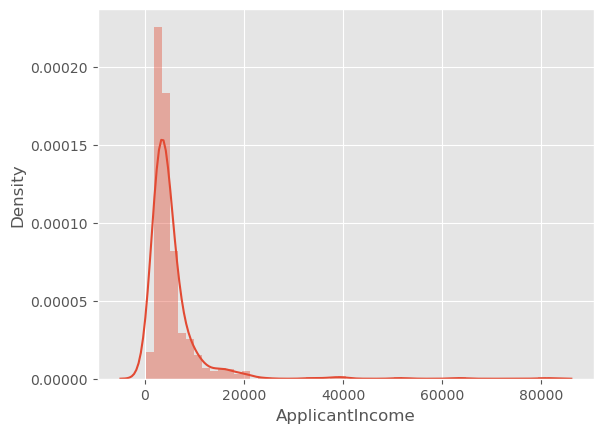

Text(0.5, 0.98, '')

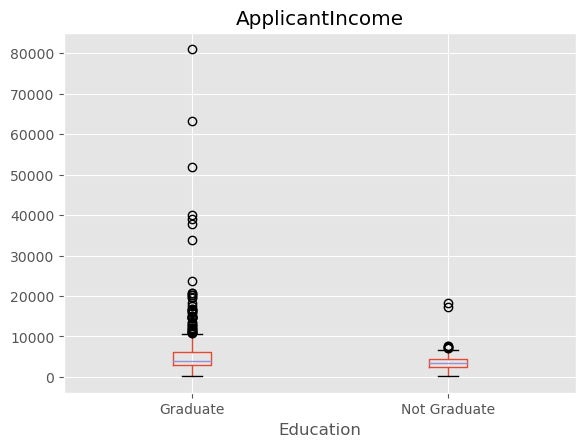

In [32]:
sns.distplot(train['ApplicantIncome'])
plt.show()
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

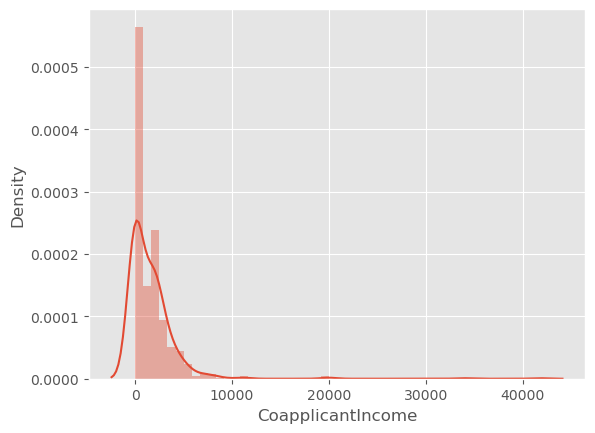

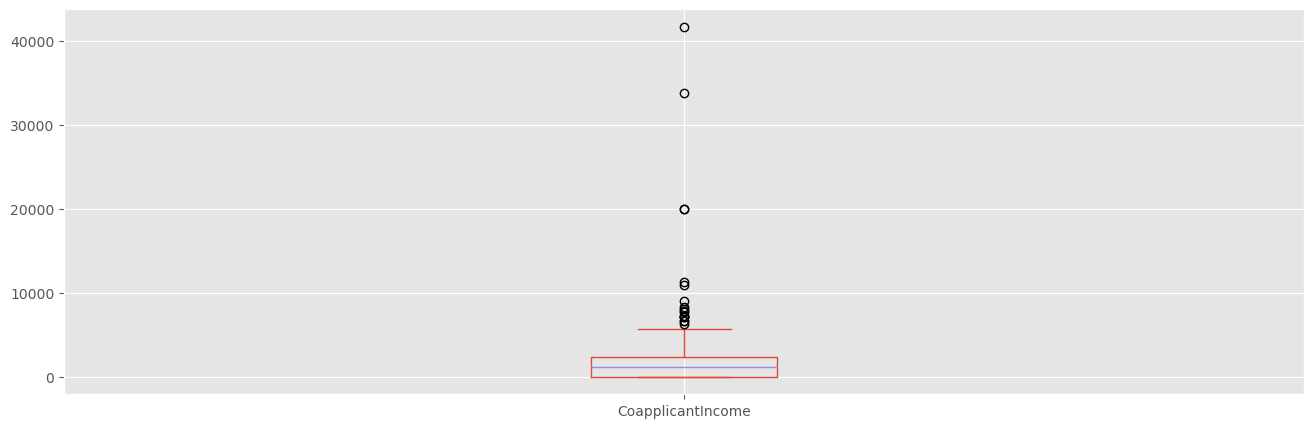

In [33]:
sns.distplot(train['CoapplicantIncome'])
plt.show()
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

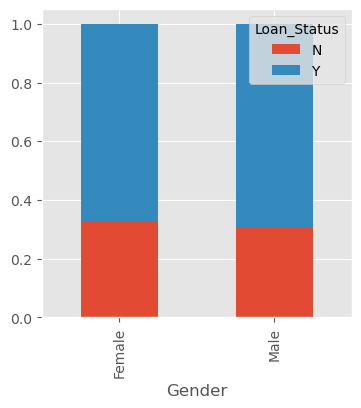

In [34]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

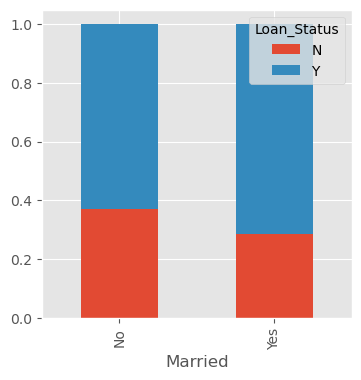

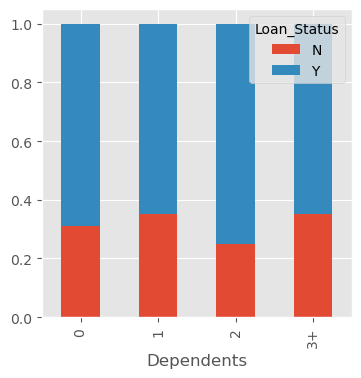

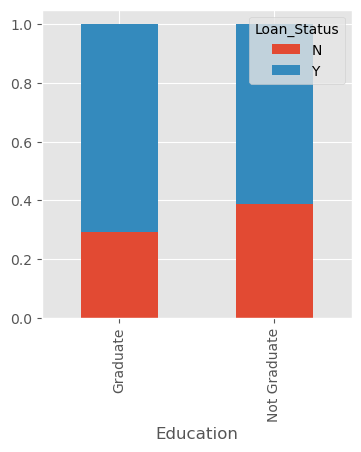

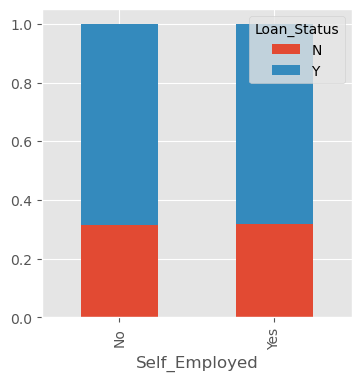

In [35]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

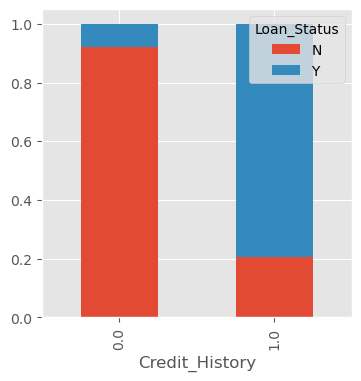

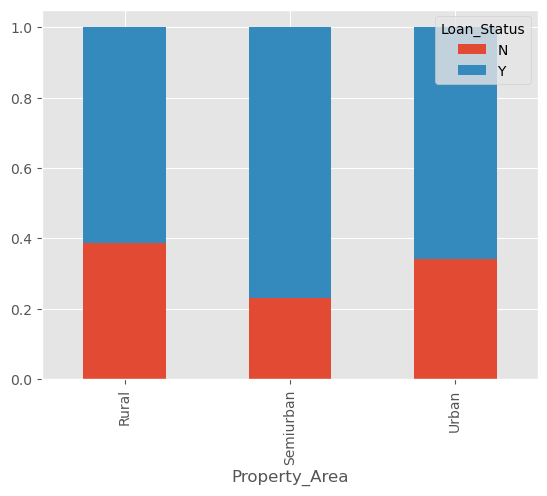

In [36]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

<AxesSubplot:xlabel='Loan_Status'>

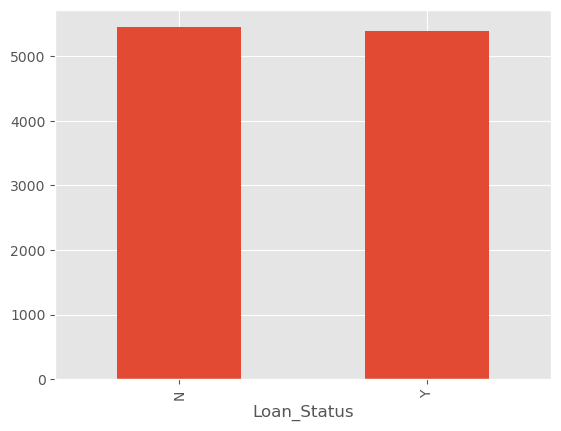

In [38]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

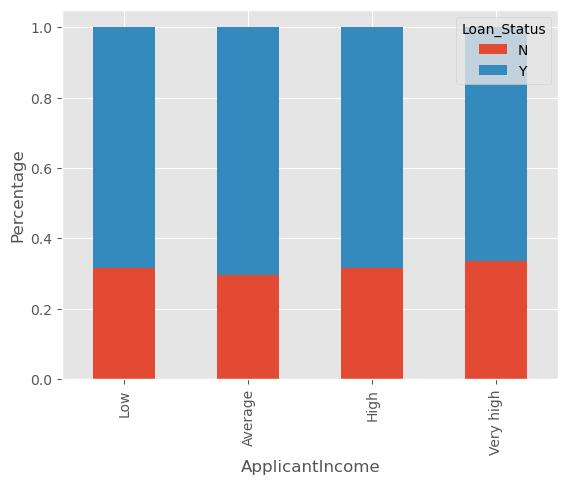

In [39]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

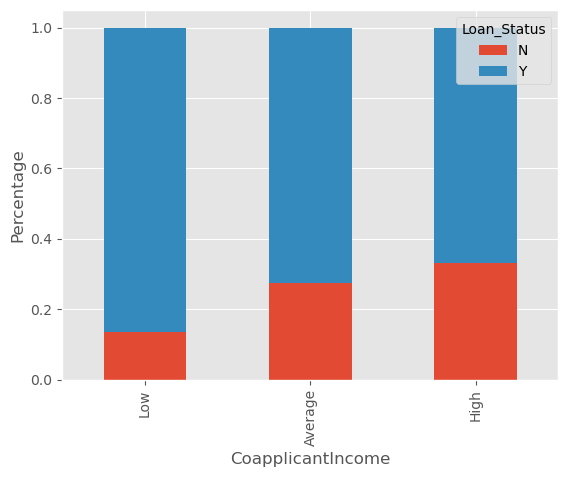

In [40]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

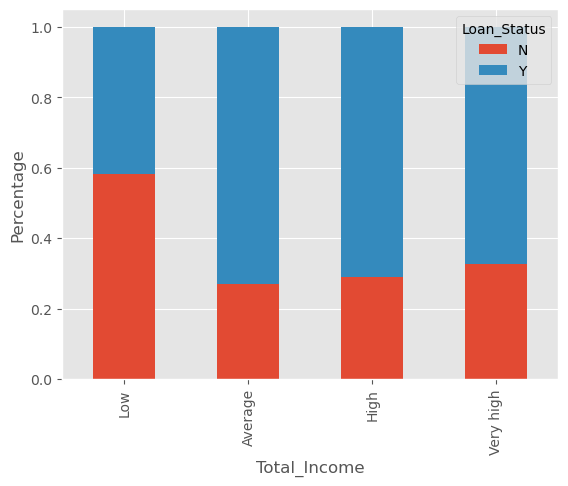

In [41]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

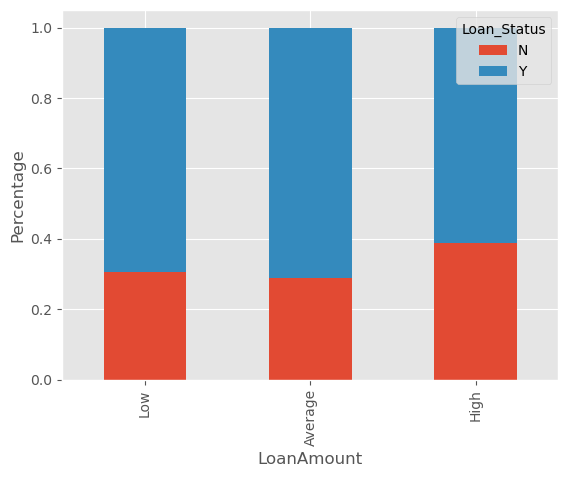

In [42]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

In [43]:
# print(train.dtypes)
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

# Correlation Matrix

<AxesSubplot:>

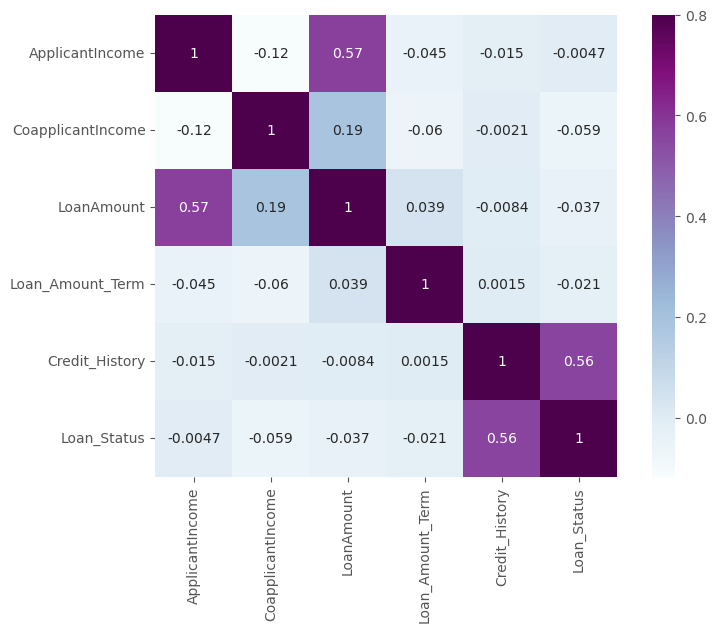

In [44]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)


In [45]:
train.corr()

ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   
Loan_Status              -0.004710          -0.059187   -0.037318   

                   Loan_Amount_Term  Credit_History  Loan_Status  
ApplicantIncome           -0.045306       -0.014715    -0.004710  
CoapplicantIncome         -0.059878       -0.002056    -0.059187  
LoanAmount                 0.039447       -0.008433    -0.037318  
Loan_Amount_Term           1.000000        0.001470    -0.021268  
Credit_History             0.001470        1.000000     0.561678  
Loan_Status               -0.021268        0.561678     1.000000

# Outlier Removal

<AxesSubplot:>

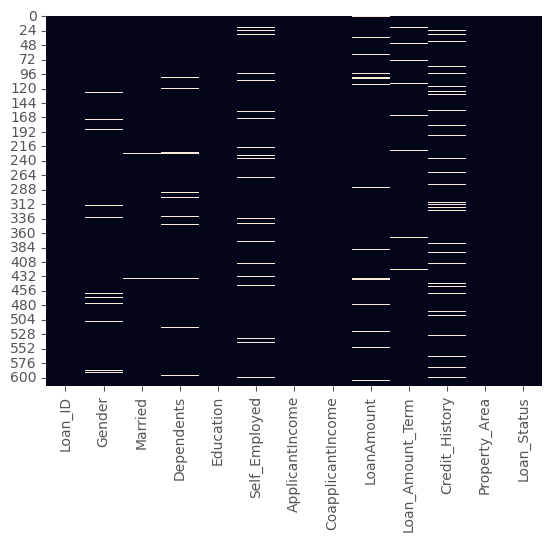

In [46]:
sns.heatmap(train.isnull(), cbar=False)

In [47]:
# Since there are null values in categorical values and discrete numerical values, so we replace them with mode of that feature.
for i in categorical_data+discrete_numerical_data:
    train[i] = train[i].fillna(train[i].mode().iloc[0])

    

In [48]:
# Now We replace the loan amount column from numerical category.
train["LoanAmount"] = train["LoanAmount"].fillna(train["LoanAmount"].median())


<AxesSubplot:>

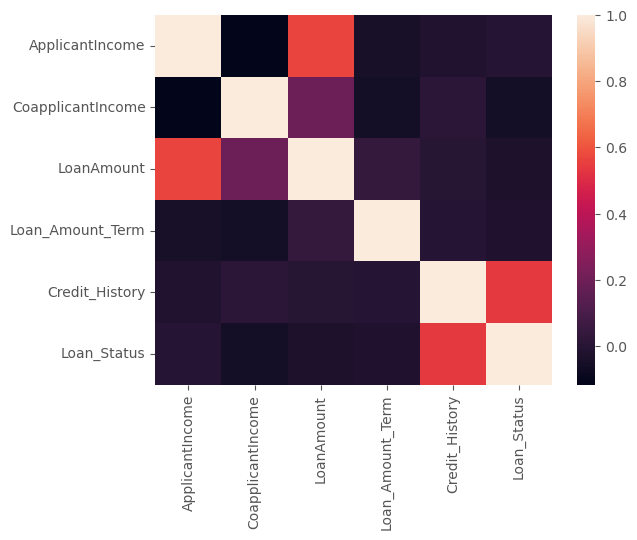

In [49]:
sns.heatmap(train.corr())

# Missing Value Imputation

In [50]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [51]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [52]:
train['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [53]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [54]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [55]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Married'].fillna(train['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

# Outlier Treatment

Text(0.5, 0, 'LoanAmount_log')

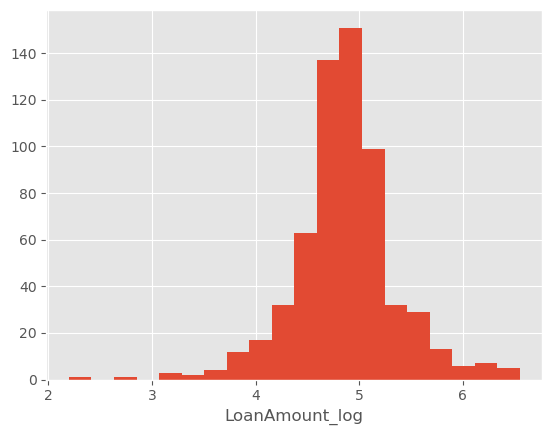

In [56]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])
plt.xlabel('LoanAmount_log')

In [57]:
train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area  Loan_Status  LoanAmount_log  
0             1.0         Urban            1        4.852030  
1             1.0         Rural            0        4.852030  
2             1.0         Urban            1        4.189655  
3             1.0         Urban            1        4.787492  
4             1.0         Urban            1        4.948760

In [58]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [59]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [60]:
from sklearn import preprocessing

# Initialize LabelEncoder
le = preprocessing.LabelEncoder()

# Convert all values in categorical columns to strings
train[categorical_data] = train[categorical_data].astype(str)

# Apply LabelEncoder to each categorical column
for i in categorical_data:
    train[i] = le.fit_transform(train[i])


KeyError: "['Loan_ID'] not in index"

In [61]:
train.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area  Loan_Status  LoanAmount_log  
0         Urban            1        4.852030  
1         Rural            0        4.852030  
2         Urban            1        4.189655  
3         Urban            1        4.787492  
4         Urban            1        4.948760

# One Hot Encoding

In [62]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)


In [63]:
X

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       128.0             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  LoanAmount_log  Gender_Female  Gender_Male  Married_No  \
0               1.0        4.852030              0            1           1   
1               1.0        4.852030              0            1           0   
2               1.0        4.189655              0            1           0   
3               1.0        4.787492              0            1           0   
4               1.0        4.948760              0            1           1   
..              ...             ...            ...          ...         ...   
609             1.0        4.262680              1            0           1   
610             1.0        3.688879              0            1           0   
611             1.0        5.533389              0            1           0   
612             1.0        5.231109              0            1           0   
613             0.0        4.890349              1            0           1   

     Married_Yes  ...  Dependents_0  Dependents_1  Dependents_2  \
0              0  ...             1             0             0   
1              1  ...             0             1             0   
2              1  ...             1             0             0   
3              1  ...             1             0             0   
4              0  ...             1             0             0   
..           ...  ...           ...           ...           ...   
609            0  ...             1             0             0   
610            1  ...             0             0             0   
611            1  ...             0             1             0   
612            1  ...             0             0             1   
613            0  ...             1             0             0   

     Education_Graduate  Education_Not Graduate  Self_Employed_No  \
0                     1                       0                 1   
1                     1                       0                 1   
2                     1                       0                 0   
3                     0                       1                 1   
4                     1                       0                 1   
..                  ...                     ...               ...   
609                   1                       0                 1   
610                   1                       0                 1   
611                   1                       0                 1   
612                   1                       0                 1   
613                   1                       0                 0   

     Self_Employed_Yes  Property_Area_Rural  Property_Area_Semiurban  \
0                    0                    0                        0   
1                    0                    1                        0   
2                    1                    0                        0   
3                    0                    0                        0   
4                    0                    0                        0   
..                 ...                  ...                      ...   
609                  0                   

In [64]:
X.shape

(614, 21)

In [65]:
y.shape

(614,)

# Data Splitting

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [67]:
x_train.shape

(429, 21)

In [68]:
 y_train.shape

(429,)

# Model Accuracy

In [69]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model1 = LogisticRegression()
model1.fit(x_train,y_train)
y_pred_model1 = model1.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_model1)
print("Accuracy score of Logistic Regression: ", accuracy*100)

Accuracy score of Logistic Regression:  77.83783783783784


In [70]:
import pandas as pd
submission = pd.DataFrame()

submission['Loan_Status'] = y_pred_model1
submission['Loan_ID'] = test_original['Loan_ID']

In [71]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [78]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('C://Users//PAVITHRA J//Downloads//OutputLogistic Regression.csv')

PermissionError: [WinError 5] Access is denied: 'C:/Users/PAVITHRA J'

In [71]:
import pandas as pd

# Read the CSV file
output_df = pd.read_csv('C://Users//PAVITHRA J//Downloads//OutputLogistic Regression.csv')
print("Output of Logistic Regression:")
print(output_df)


Output of Logistic Regression:
     Unnamed: 0   Loan_ID Loan_Status
0             0  LP001015           Y
1             1  LP001022           Y
2             2  LP001031           Y
3             3  LP001035           Y
4             4  LP001051           Y
..          ...       ...         ...
180         180  LP002018           Y
181         181  LP002027           Y
182         182  LP002028           Y
183         183  LP002042           Y
184         184  LP002045           Y

[185 rows x 3 columns]


In [72]:
## Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)
y_pred_model2 = model2.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_model2)
print("Accuracy score of Decision Tree: ", accuracy*100)

Accuracy score of Decision Tree:  65.94594594594595


In [73]:
from sklearn.tree import DecisionTreeClassifier, export_text
# Generate and print the textual representation of the decision tree
tree_text_representation = export_text(model2, feature_names=list(X.columns))
print("\nDecision Tree Representation:\n")
print(tree_text_representation)


Decision Tree Representation:

|--- Credit_History <= 0.50
|   |--- LoanAmount_log <= 6.30
|   |   |--- LoanAmount_log <= 4.86
|   |   |   |--- CoapplicantIncome <= 2360.00
|   |   |   |   |--- class: 0
|   |   |   |--- CoapplicantIncome >  2360.00
|   |   |   |   |--- Loan_Amount_Term <= 270.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Loan_Amount_Term >  270.00
|   |   |   |   |   |--- class: 0
|   |   |--- LoanAmount_log >  4.86
|   |   |   |--- LoanAmount_log <= 4.88
|   |   |   |   |--- class: 1
|   |   |   |--- LoanAmount_log >  4.88
|   |   |   |   |--- LoanAmount_log <= 5.15
|   |   |   |   |   |--- LoanAmount_log <= 5.07
|   |   |   |   |   |   |--- ApplicantIncome <= 2462.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- ApplicantIncome >  2462.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- LoanAmount_log >  5.07
|   |   |   |   |   |   |--- Dependents_0 <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   

In [74]:
## Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(x_train,y_train)
y_pred_model3 = model3.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_model3)
print("Accuracy score of Random Forest: ", accuracy*100)

Accuracy score of Random Forest:  75.13513513513513


In [75]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X, y)
decision_trees = random_forest.estimators_

for i, tree in enumerate(decision_trees):
    print(f"\nDecision Tree {i+1} Representation:\n")
    tree_text_representation = export_text(tree, feature_names=list(X.columns))
    print(tree_text_representation)



Decision Tree 1 Representation:

|--- Property_Area_Semiurban <= 0.50
|   |--- Education_Not Graduate <= 0.50
|   |   |--- ApplicantIncome <= 3247.00
|   |   |   |--- Dependents_1 <= 0.50
|   |   |   |   |--- ApplicantIncome <= 2476.00
|   |   |   |   |   |--- Married_Yes <= 0.50
|   |   |   |   |   |   |--- Property_Area_Urban <= 0.50
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- Property_Area_Urban >  0.50
|   |   |   |   |   |   |   |--- Gender_Male <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- Gender_Male >  0.50
|   |   |   |   |   |   |   |   |--- ApplicantIncome <= 2224.50
|   |   |   |   |   |   |   |   |   |--- ApplicantIncome <= 1818.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |--- ApplicantIncome >  1818.00
|   |   |   |   |   |   |   |   |   |   |--- CoapplicantIncome <= 17883.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |  

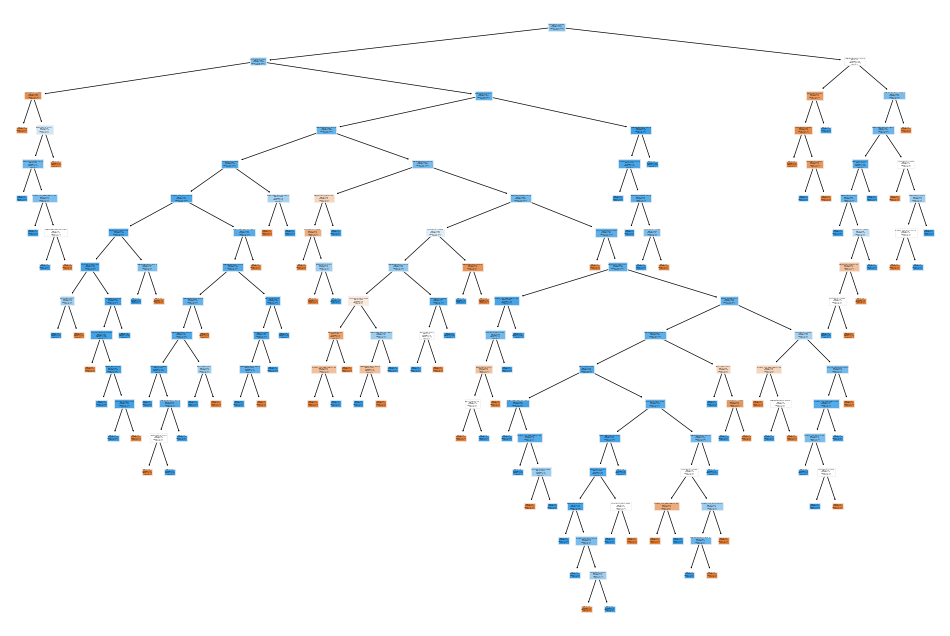

NameError: name 'shap' is not defined

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

chosen_tree_index = 0
chosen_tree = model3.estimators_[chosen_tree_index]

# Visualize the chosen tree
plt.figure(figsize=(12, 8))
tree.plot_tree(chosen_tree, feature_names=list(X.columns), class_names=['0', '1'], filled=True)
plt.show()

# Calculate SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Create the SHAP plot
shap.summary_plot(shap_values, X)


In [13]:
pip install shap
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Calculate SHAP values
explainer = shap.TreeExplainer(mode3)
shap_values = explainer.shap_values(X)

# Create the SHAP plot
shap.summary_plot(shap_values, X)

SyntaxError: invalid syntax (2025322864.py, line 1)

In [77]:
#KNearestNeighbors model
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(x_train,y_train)
y_pred_model4 = model4.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_model4)
print("Accuracy score of KNeighbors: ", accuracy*100)

Accuracy score of KNeighbors:  56.75675675675676


In [78]:
#Naive Bayes model
from sklearn.naive_bayes import GaussianNB
model5 = GaussianNB()
model5.fit(x_train,y_train)
y_pred_model5 = model5.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_model5)
print("Accuracy score of Naive Bayes: ", accuracy*100)

Accuracy score of Naive Bayes:  78.91891891891892


# Model Classification Report

In [79]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name,y_test,y_pred):
  report = classification_report(y_test,y_pred)
  print(f"Classification Report For {model_name}:\n{report}\n")

generate_classification_report(model1,y_test,y_pred_model1)
generate_classification_report(model2,y_test,y_pred_model2)
generate_classification_report(model3,y_test,y_pred_model3)
generate_classification_report(model4,y_test,y_pred_model4)
generate_classification_report(model5,y_test,y_pred_model5)

Classification Report For LogisticRegression():
              precision    recall  f1-score   support

           0       1.00      0.36      0.53        64
           1       0.75      1.00      0.86       121

    accuracy                           0.78       185
   macro avg       0.87      0.68      0.69       185
weighted avg       0.83      0.78      0.74       185


Classification Report For DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.51      0.45      0.48        64
           1       0.73      0.77      0.75       121

    accuracy                           0.66       185
   macro avg       0.62      0.61      0.61       185
weighted avg       0.65      0.66      0.65       185


Classification Report For RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.82      0.36      0.50        64
           1       0.74      0.96      0.83       121

    accuracy                

# Model Kfold

In [80]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# Initialize 5 splits
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for i, (train_index, test_index) in enumerate(kf.split(X, y), 1):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    logistic_regression = LogisticRegression()

    logistic_regression.fit(x_train, y_train)
    
    
    predicted_values_lr = logistic_regression.predict(x_test)
    
    # Generate and print the classification report for the current fold
    print(f"\nLogistic Regression Classification Report for Fold {i}:\n")
    print(classification_report(y_test, predicted_values_lr, target_names=["0", "1"]))
    print("="*50)    


Logistic Regression Classification Report for Fold 1:

              precision    recall  f1-score   support

           0       0.94      0.45      0.61        38
           1       0.80      0.99      0.88        85

    accuracy                           0.82       123
   macro avg       0.87      0.72      0.75       123
weighted avg       0.84      0.82      0.80       123


Logistic Regression Classification Report for Fold 2:

              precision    recall  f1-score   support

           0       0.77      0.45      0.57        38
           1       0.79      0.94      0.86        85

    accuracy                           0.79       123
   macro avg       0.78      0.69      0.71       123
weighted avg       0.79      0.79      0.77       123


Logistic Regression Classification Report for Fold 3:

              precision    recall  f1-score   support

           0       0.84      0.41      0.55        39
           1       0.78      0.96      0.86        84

    accuracy  

In [81]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score


# Initialize evaluation metrics
accuracy_list = []
precision_list_0 = []
precision_list_1 = []
recall_list_0 = []
recall_list_1 = []
f1_list_0 = []
f1_list_1 = []

kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    x_train, x_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    logistic_regression = LogisticRegression()

    logistic_regression.fit(x_train, y_train)
    
    predicted_values_lr = logistic_regression.predict(x_test)
    
    #class 0
    precision_0 = precision_score(y_test, predicted_values_lr, pos_label=0)
    recall_0 = recall_score(y_test, predicted_values_lr, pos_label=0)
    f1_0 = f1_score(y_test, predicted_values_lr, pos_label=0)
    
    # class 1
    precision_1 = precision_score(y_test, predicted_values_lr, pos_label=1)
    recall_1 = recall_score(y_test, predicted_values_lr, pos_label=1)
    f1_1 = f1_score(y_test, predicted_values_lr, pos_label=1)

    accuracy = accuracy_score(y_test, predicted_values_lr)
    precision_list_0.append(precision_0)
    recall_list_0.append(recall_0)
    f1_list_0.append(f1_0)
    precision_list_1.append(precision_1)
    recall_list_1.append(recall_1)
    f1_list_1.append(f1_1)
    accuracy_list.append(accuracy)

# mean values
mean_accuracy = np.mean(accuracy_list)
mean_precision_0 = np.mean(precision_list_0)
mean_recall_0 = np.mean(recall_list_0)
mean_f1_0 = np.mean(f1_list_0)
mean_precision_1 = np.mean(precision_list_1)
mean_recall_1 = np.mean(recall_list_1)
mean_f1_1 = np.mean(f1_list_1)

print("Logistic Regression")
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision for class 0:", mean_precision_0)
print("Mean Recall for class 0:", mean_recall_0)
print("Mean F1 Score for class 0:", mean_f1_0)
print("Mean Precision for class 1:", mean_precision_1)
print("Mean Recall for class 1:", mean_recall_1)
print("Mean F1 Score for class 1:", mean_f1_1)


Logistic Regression
Mean Accuracy: 0.8012928162068507
Mean Precision for class 0: 0.8591794871794873
Mean Recall for class 0: 0.4480431848852901
Mean F1 Score for class 0: 0.583244963824656
Mean Precision for class 1: 0.793400934513896
Mean Recall for class 1: 0.9620728291316526
Mean F1 Score for class 1: 0.8692528744333649


In [82]:
## Define the parameter grid to search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

logistic_regression = LogisticRegression(max_iter=1000)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=kf, scoring='accuracy')

# Perform hyperparameter tuning
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_

best_model = LogisticRegression(**best_params, max_iter=1000)
best_model.fit(X, y)


predicted_values = best_model.predict(X)
report = classification_report(y, predicted_values)
print("Best Hyperparameters:", best_params)
print("\nClassification Report:\n", report)


Best Hyperparameters: {'C': 1, 'penalty': 'l2'}

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.45      0.60       192
           1       0.79      0.97      0.88       422

    accuracy                           0.81       614
   macro avg       0.84      0.71      0.74       614
weighted avg       0.82      0.81      0.79       614



# ROC for Logistic Regression

Specificity: 0.37209302325581395
Sensitivity: 0.975
PPV: 0.7428571428571429
NPV: 0.8888888888888888
ROC AUC: 0.7656976744186046


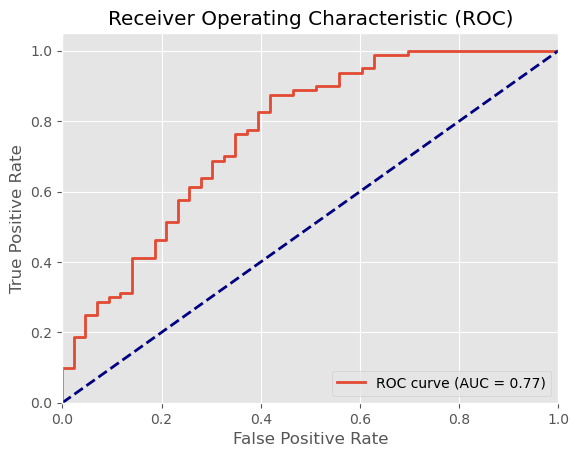

In [83]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logistic_regression = LogisticRegression()

logistic_regression.fit(x_train, y_train)
predicted_values_lr = logistic_regression.predict(x_test)

tn, fp, fn, tp = confusion_matrix(y_test, predicted_values_lr).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
ppv = tp / (tp + fp)
npv = tn / (tn + fn)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, logistic_regression.predict_proba(x_test)[:,1])
roc_auc = auc(fpr, tpr)

print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("PPV:", ppv)
print("NPV:", npv)
print("ROC AUC:", roc_auc)

# Plot ROC curve
plt.plot(fpr, tpr, lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


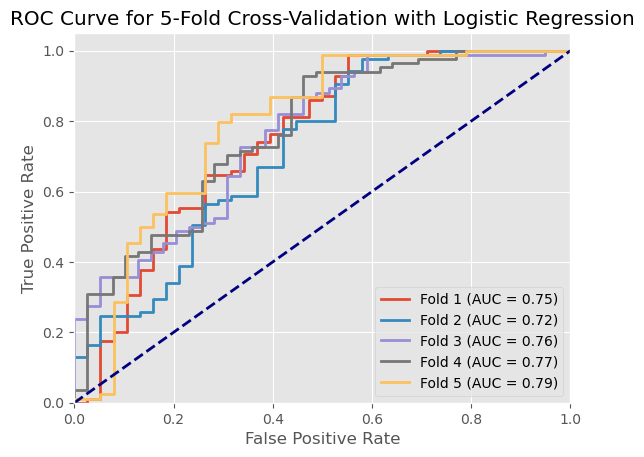

In [84]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fpr_list = []
tpr_list = []
roc_auc_list = []

for fold_idx, (train_index, test_index) in enumerate(kf.split(X, y), 1):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
   
    logistic_regression = LogisticRegression()
    
    logistic_regression.fit(x_train_fold, y_train_fold)
    
    probs_fold = logistic_regression.predict_proba(x_test_fold)
    fpr_fold, tpr_fold, _ = roc_curve(y_test_fold, probs_fold[:, 1])
    roc_auc_fold = auc(fpr_fold, tpr_fold)
    
    fpr_list.append(fpr_fold)
    tpr_list.append(tpr_fold)
    roc_auc_list.append(roc_auc_fold)
    
    plt.plot(fpr_fold, tpr_fold, lw=2, label=f'Fold {fold_idx} (AUC = {roc_auc_fold:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for 5-Fold Cross-Validation with Logistic Regression')
plt.legend(loc="lower right")
plt.show()


# Hyper Parameter Tuning LR

Specificity: 0.37209302325581395
Sensitivity: 0.975
PPV: 0.7428571428571429
NPV: 0.8888888888888888
ROC AUC: 0.7656976744186046


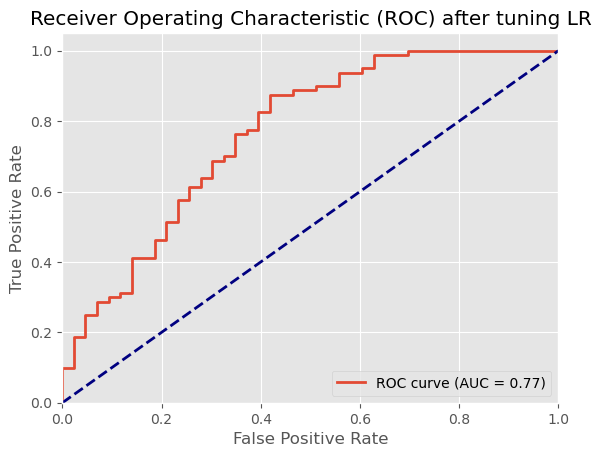

In [85]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_regression_best = LogisticRegression(C=1, penalty='l2')

logistic_regression_best.fit(x_train, y_train)
predicted_values_lr = logistic_regression_best.predict(x_test)

tn, fp, fn, tp = confusion_matrix(y_test, predicted_values_lr).ravel()

specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
ppv = tp / (tp + fp)
npv = tn / (tn + fn)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, logistic_regression_best.predict_proba(x_test)[:,1])
roc_auc = auc(fpr, tpr)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("PPV:", ppv)
print("NPV:", npv)
print("ROC AUC:", roc_auc)

# Plot ROC curve
plt.plot(fpr, tpr, lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) after tuning LR')
plt.legend(loc="lower right")
plt.show()


# ROC for Kfold LR

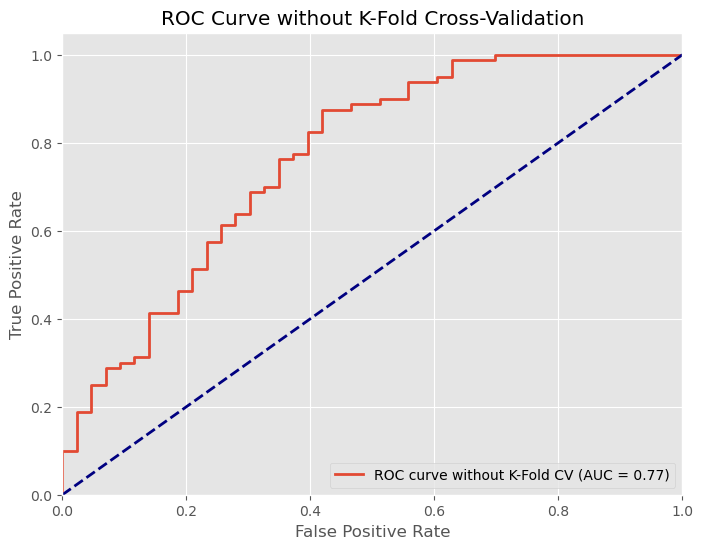

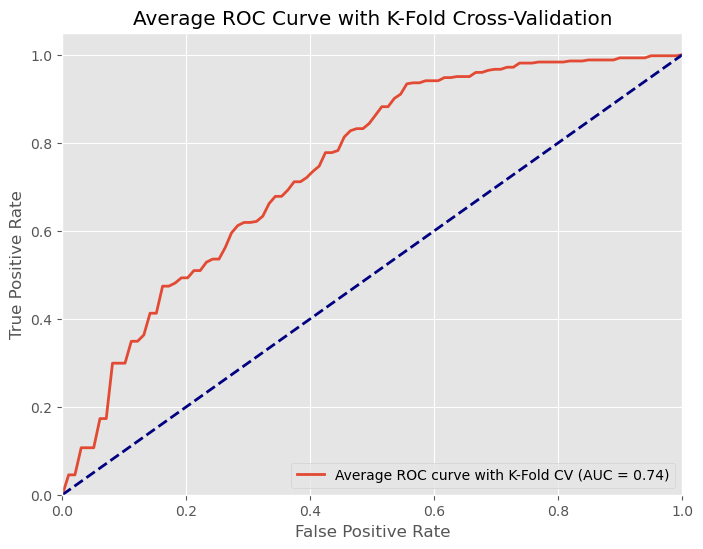

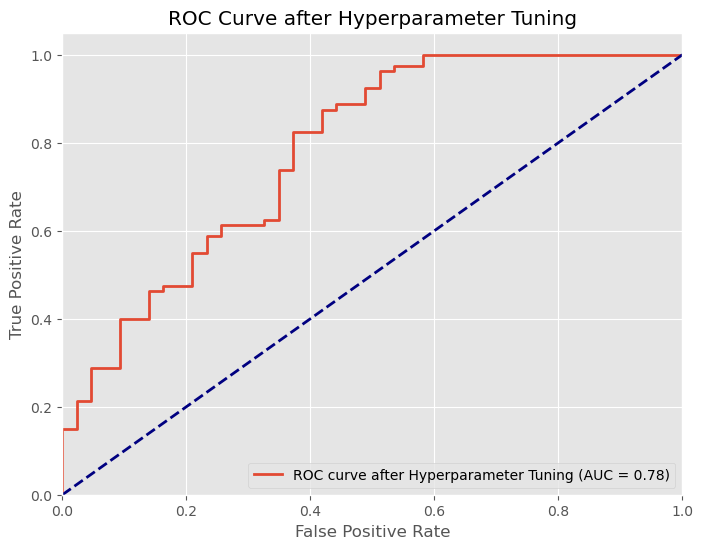

In [86]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logistic_regression_no_cv = LogisticRegression()
logistic_regression_no_cv.fit(x_train, y_train)

predicted_values_lr_no_cv = logistic_regression_no_cv.predict_proba(x_test)[:, 1]

fpr_lr_no_cv, tpr_lr_no_cv, _ = roc_curve(y_test, predicted_values_lr_no_cv)
roc_auc_lr_no_cv = auc(fpr_lr_no_cv, tpr_lr_no_cv)

logistic_regression_cv = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(logistic_regression_cv, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X, y)

best_lr_cv = grid_search.best_estimator_
best_params = grid_search.best_params_

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fpr_list_lr = []
tpr_list_lr = []

for train_index, test_index in kf.split(X, y):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    best_lr_cv.fit(x_train_fold, y_train_fold)
    
    predicted_values_lr = best_lr_cv.predict_proba(x_test_fold)[:, 1]
    
    fpr_fold, tpr_fold, _ = roc_curve(y_test_fold, predicted_values_lr)
    
    fpr_list_lr.append(fpr_fold)
    tpr_list_lr.append(tpr_fold)

mean_fpr_lr = np.linspace(0, 1, 100)
mean_tpr_lr = np.mean([np.interp(mean_fpr_lr, fpr, tpr) for fpr, tpr in zip(fpr_list_lr, tpr_list_lr)], axis=0)
mean_tpr_lr[0] = 0.0  # Make sure the ROC curve starts at (0,0)

roc_auc_lr_cv = auc(mean_fpr_lr, mean_tpr_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr_no_cv, tpr_lr_no_cv, lw=2, label='ROC curve without K-Fold CV (AUC = %0.2f)' % roc_auc_lr_no_cv)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve without K-Fold Cross-Validation')
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(mean_fpr_lr, mean_tpr_lr, lw=2, label='Average ROC curve with K-Fold CV (AUC = %0.2f)' % roc_auc_lr_cv)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Average ROC Curve with K-Fold Cross-Validation')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve after hyperparameter tuning
predicted_values_lr_tuned = best_lr_cv.predict_proba(x_test)[:, 1]
fpr_lr_tuned, tpr_lr_tuned, _ = roc_curve(y_test, predicted_values_lr_tuned)
roc_auc_lr_tuned = auc(fpr_lr_tuned, tpr_lr_tuned)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr_tuned, tpr_lr_tuned, lw=2, label='ROC curve after Hyperparameter Tuning (AUC = %0.2f)' % roc_auc_lr_tuned)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve after Hyperparameter Tuning')
plt.legend(loc="lower right")
plt.show()



# Classification Report for Decision Tree 

In [87]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

# Initialize StratifiedKFold with 5 splits
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over each fold
for i, (train_index, test_index) in enumerate(kf.split(X, y), 1):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize DecisionTreeClassifier
    decision_tree = DecisionTreeClassifier()
    
    # Train the DecisionTreeClassifier model
    decision_tree.fit(x_train, y_train)
    
    # Make predictions on the test set
    predicted_values_dt = decision_tree.predict(x_test)
    
    # Generate and print the classification report for the current fold
    print(f"\nDecision Tree Classification Report for Fold {i}:\n")
    print(classification_report(y_test, predicted_values_dt, target_names=["0", "1"]))
    print("="*50)    


Decision Tree Classification Report for Fold 1:

              precision    recall  f1-score   support

           0       0.56      0.61      0.58        38
           1       0.82      0.79      0.80        85

    accuracy                           0.73       123
   macro avg       0.69      0.70      0.69       123
weighted avg       0.74      0.73      0.73       123


Decision Tree Classification Report for Fold 2:

              precision    recall  f1-score   support

           0       0.55      0.42      0.48        38
           1       0.77      0.85      0.80        85

    accuracy                           0.72       123
   macro avg       0.66      0.63      0.64       123
weighted avg       0.70      0.72      0.70       123


Decision Tree Classification Report for Fold 3:

              precision    recall  f1-score   support

           0       0.64      0.46      0.54        39
           1       0.78      0.88      0.83        84

    accuracy                    

In [88]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Initialize lists to store evaluation metrics
accuracy_list = []
precision_list_0 = []
precision_list_1 = []
recall_list_0 = []
recall_list_1 = []
f1_list_0 = []
f1_list_1 = []

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# Iterate over each fold
for train_index, test_index in kf.split(X, y):
    x_train, x_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Initialize DecisionTreeClassifier
    decision_tree = DecisionTreeClassifier()
    
    # Train the DecisionTreeClassifier model
    decision_tree.fit(x_train, y_train)
    
    # Make predictions on the test set
    predicted_values_dt = decision_tree.predict(x_test)
    
    # Calculate evaluation metrics for class 0
    precision_0 = precision_score(y_test, predicted_values_dt, pos_label=0)
    recall_0 = recall_score(y_test, predicted_values_dt, pos_label=0)
    f1_0 = f1_score(y_test, predicted_values_dt, pos_label=0)
    
    # Calculate evaluation metrics for class 1
    precision_1 = precision_score(y_test, predicted_values_dt, pos_label=1)
    recall_1 = recall_score(y_test, predicted_values_dt, pos_label=1)
    f1_1 = f1_score(y_test, predicted_values_dt, pos_label=1)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predicted_values_dt)
    
    # Append metrics to the lists
    precision_list_0.append(precision_0)
    recall_list_0.append(recall_0)
    f1_list_0.append(f1_0)
    precision_list_1.append(precision_1)
    recall_list_1.append(recall_1)
    f1_list_1.append(f1_1)
    accuracy_list.append(accuracy)

# Calculate mean values
mean_accuracy = np.mean(accuracy_list)
mean_precision_0 = np.mean(precision_list_0)
mean_recall_0 = np.mean(recall_list_0)
mean_f1_0 = np.mean(f1_list_0)
mean_precision_1 = np.mean(precision_list_1)
mean_recall_1 = np.mean(recall_list_1)
mean_f1_1 = np.mean(f1_list_1)

# Print mean values
print("Decision Tree Classifier")
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision for class 0:", mean_precision_0)
print("Mean Recall for class 0:", mean_recall_0)
print("Mean F1 Score for class 0:", mean_f1_0)
print("Mean Precision for class 1:", mean_precision_1)
print("Mean Recall for class 1:", mean_recall_1)
print("Mean F1 Score for class 1:", mean_f1_1)


Decision Tree Classifier
Mean Accuracy: 0.7019059043049447
Mean Precision for class 0: 0.5263121572046057
Mean Recall for class 0: 0.541970310391363
Mean F1 Score for class 0: 0.5321169106021479
Mean Precision for class 1: 0.7881754874503523
Mean Recall for class 1: 0.7749299719887954
Mean F1 Score for class 1: 0.7808350391733452


# Roc curve for decision tree

Specificity: 0.46511627906976744
Sensitivity: 0.775
PPV: 0.7294117647058823
NPV: 0.5263157894736842
ROC AUC: 0.6200581395348838


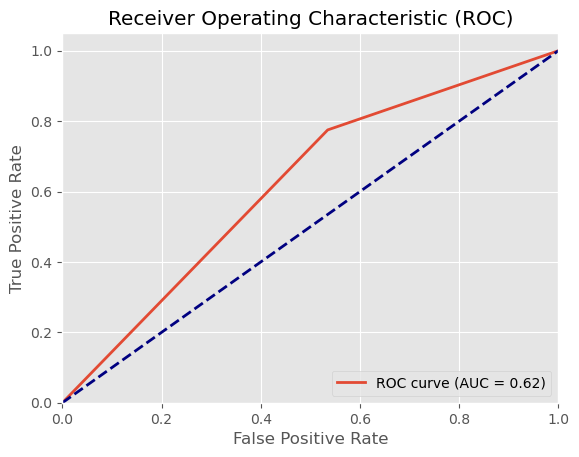

In [89]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree = DecisionTreeClassifier()

# Train the Logistic Regression model
decision_tree.fit(x_train, y_train)
# Make predictions on the test set
predicted_values_lr = decision_tree.predict(x_test)

# Generate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predicted_values_lr).ravel()

# Calculate specificity, sensitivity, ppv, npv
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
ppv = tp / (tp + fp)
npv = tn / (tn + fn)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, decision_tree.predict_proba(x_test)[:,1])
roc_auc = auc(fpr, tpr)

# Print the metrics
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("PPV:", ppv)
print("NPV:", npv)
print("ROC AUC:", roc_auc)

# Plot ROC curve
plt.plot(fpr, tpr, lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# ROC curve for kfold DT

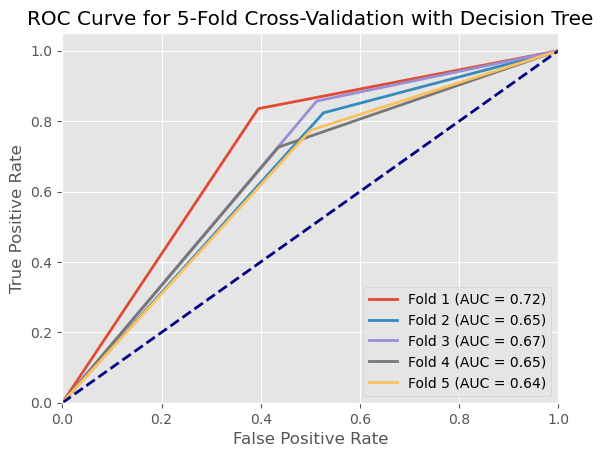

In [90]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

# Initialize StratifiedKFold with 5 splits
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store fpr, tpr, and roc_auc for each fold
fpr_list = []
tpr_list = []
roc_auc_list = []

# Iterate over each fold
for fold_idx, (train_index, test_index) in enumerate(kf.split(X, y), 1):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize Logistic Regression
    decision_tree = DecisionTreeClassifier()
    
    # Train the Logistic Regression model
    decision_tree.fit(x_train_fold, y_train_fold)
    
    # Make predictions on the test set
    probs_fold = decision_tree.predict_proba(x_test_fold)
    fpr_fold, tpr_fold, _ = roc_curve(y_test_fold, probs_fold[:, 1])
    roc_auc_fold = auc(fpr_fold, tpr_fold)
    
    # Append fpr, tpr, roc_auc to lists
    fpr_list.append(fpr_fold)
    tpr_list.append(tpr_fold)
    roc_auc_list.append(roc_auc_fold)
    
    # Plot ROC curve for the current fold
    plt.plot(fpr_fold, tpr_fold, lw=2, label=f'Fold {fold_idx} (AUC = {roc_auc_fold:.2f})')

# Plot ROC curve for each fold
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for 5-Fold Cross-Validation with Decision Tree')
plt.legend(loc="lower right")
plt.show()


# Comparing both ROC of DT

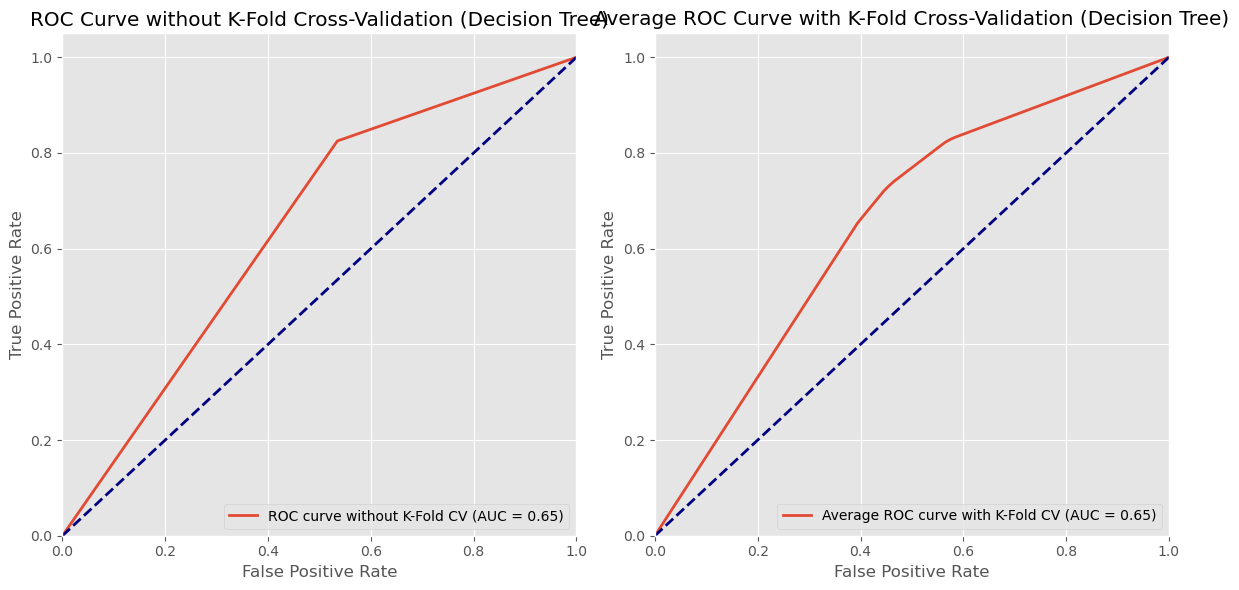

In [91]:
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree classifier without k-fold cross-validation
decision_tree_no_cv = DecisionTreeClassifier()

# Train the Decision Tree model without k-fold cross-validation
decision_tree_no_cv.fit(x_train, y_train)

# Make predictions on the test set without k-fold cross-validation
predicted_values_dt_no_cv = decision_tree_no_cv.predict_proba(x_test)[:, 1]

# Generate ROC curve without k-fold cross-validation
fpr_dt_no_cv, tpr_dt_no_cv, _ = roc_curve(y_test, predicted_values_dt_no_cv)
roc_auc_dt_no_cv = auc(fpr_dt_no_cv, tpr_dt_no_cv)

# Initialize Decision Tree classifier with k-fold cross-validation
decision_tree_cv = DecisionTreeClassifier()

# Train the Decision Tree model with k-fold cross-validation
decision_tree_cv.fit(X, y)

# Initialize StratifiedKFold with 5 splits
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store fpr, tpr for each fold
fpr_list_dt = []
tpr_list_dt = []

# Iterate over each fold
for train_index, test_index in kf.split(X, y):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    # Train the Decision Tree model
    decision_tree_cv.fit(x_train_fold, y_train_fold)
    
    # Make predictions on the test set
    predicted_values_dt = decision_tree_cv.predict_proba(x_test_fold)[:, 1]
    
    # Generate ROC curve
    fpr_fold, tpr_fold, _ = roc_curve(y_test_fold, predicted_values_dt)
    
    # Append fpr, tpr to lists
    fpr_list_dt.append(fpr_fold)
    tpr_list_dt.append(tpr_fold)

# Calculate mean false positive rate (mean_fpr) across all folds
mean_fpr_dt = np.linspace(0, 1, 100)
mean_tpr_dt = np.mean([np.interp(mean_fpr_dt, fpr, tpr) for fpr, tpr in zip(fpr_list_dt, tpr_list_dt)], axis=0)
mean_tpr_dt[0] = 0.0  # Make sure the ROC curve starts at (0,0)

# Calculate AUC for the average ROC curve
roc_auc_dt_cv = auc(mean_fpr_dt, mean_tpr_dt)

# Plot ROC curves
plt.figure(figsize=(12, 6))

# ROC curve without k-fold cross-validation
plt.subplot(1, 2, 1)
plt.plot(fpr_dt_no_cv, tpr_dt_no_cv, lw=2, label='ROC curve without K-Fold CV (AUC = %0.2f)' % roc_auc_dt_no_cv)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve without K-Fold Cross-Validation (Decision Tree)')
plt.legend(loc="lower right")

# Average ROC curve with k-fold cross-validation
plt.subplot(1, 2, 2)
plt.plot(mean_fpr_dt, mean_tpr_dt, lw=2, label='Average ROC curve with K-Fold CV (AUC = %0.2f)' % roc_auc_dt_cv)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Average ROC Curve with K-Fold Cross-Validation (Decision Tree)')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


# Kfold Classification Report for Random Forest

In [92]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Initialize StratifiedKFold with 5 splits
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over each fold
for i, (train_index, test_index) in enumerate(kf.split(X, y), 1):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize RandomForestClassifier
    random_forest = RandomForestClassifier()
    
    # Train the RandomForestClassifier model
    random_forest.fit(x_train, y_train)
    
    # Make predictions on the test set
    predicted_values_rf = random_forest.predict(x_test)
    
    # Generate and print the classification report for the current fold
    print(f"\nRandom Forest Classification Report for Fold {i}:\n")
    print(classification_report(y_test, predicted_values_rf, target_names=["0", "1"]))
    print("="*50)



Random Forest Classification Report for Fold 1:

              precision    recall  f1-score   support

           0       0.82      0.47      0.60        38
           1       0.80      0.95      0.87        85

    accuracy                           0.80       123
   macro avg       0.81      0.71      0.74       123
weighted avg       0.81      0.80      0.79       123


Random Forest Classification Report for Fold 2:

              precision    recall  f1-score   support

           0       0.75      0.47      0.58        38
           1       0.80      0.93      0.86        85

    accuracy                           0.79       123
   macro avg       0.77      0.70      0.72       123
weighted avg       0.78      0.79      0.77       123


Random Forest Classification Report for Fold 3:

              precision    recall  f1-score   support

           0       0.70      0.41      0.52        39
           1       0.77      0.92      0.84        84

    accuracy                    

In [93]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Initialize lists to store evaluation metrics
accuracy_list = []
precision_list_0 = []
precision_list_1 = []
recall_list_0 = []
recall_list_1 = []
f1_list_0 = []
f1_list_1 = []

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# Iterate over each fold
for train_index, test_index in kf.split(X, y):
    x_train, x_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Initialize RandomForestClassifier
    random_forest = RandomForestClassifier()
    
    # Train the RandomForestClassifier model
    random_forest.fit(x_train, y_train)
    
    # Make predictions on the test set
    predicted_values_rf = random_forest.predict(x_test)
    
    # Calculate evaluation metrics for class 0
    precision_0 = precision_score(y_test, predicted_values_rf, pos_label=0)
    recall_0 = recall_score(y_test, predicted_values_rf, pos_label=0)
    f1_0 = f1_score(y_test, predicted_values_rf, pos_label=0)
    
    # Calculate evaluation metrics for class 1
    precision_1 = precision_score(y_test, predicted_values_rf, pos_label=1)
    recall_1 = recall_score(y_test, predicted_values_rf, pos_label=1)
    f1_1 = f1_score(y_test, predicted_values_rf, pos_label=1)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predicted_values_rf)
    
    # Append metrics to the lists
    precision_list_0.append(precision_0)
    recall_list_0.append(recall_0)
    f1_list_0.append(f1_0)
    precision_list_1.append(precision_1)
    recall_list_1.append(recall_1)
    f1_list_1.append(f1_1)
    accuracy_list.append(accuracy)

# Calculate mean values
mean_accuracy = np.mean(accuracy_list)
mean_precision_0 = np.mean(precision_list_0)
mean_recall_0 = np.mean(recall_list_0)
mean_f1_0 = np.mean(f1_list_0)
mean_precision_1 = np.mean(precision_list_1)
mean_recall_1 = np.mean(recall_list_1)
mean_f1_1 = np.mean(f1_list_1)

# Print mean values
print("Random Forest Classifier")
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision for class 0:", mean_precision_0)
print("Mean Recall for class 0:", mean_recall_0)
print("Mean F1 Score for class 0:", mean_f1_0)
print("Mean Precision for class 1:", mean_precision_1)
print("Mean Recall for class 1:", mean_recall_1)
print("Mean F1 Score for class 1:", mean_f1_1)


Random Forest Classifier
Mean Accuracy: 0.7930694388911103
Mean Precision for class 0: 0.7729362591431557
Mean Recall for class 0: 0.47894736842105257
Mean F1 Score for class 0: 0.5899194326064641
Mean Precision for class 1: 0.7982780320585249
Mean Recall for class 1: 0.9359103641456581
Mean F1 Score for class 1: 0.8614929525235718


# ROC curve for Random forest

Specificity: 0.4186046511627907
Sensitivity: 0.95
PPV: 0.7524752475247525
NPV: 0.8181818181818182
ROC AUC: 0.7383720930232559


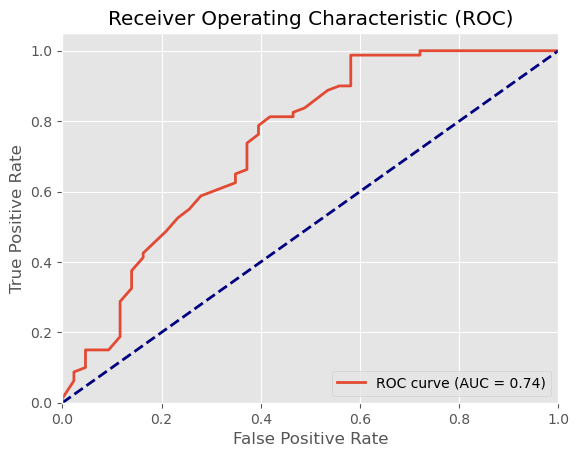

In [94]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
random_forest = RandomForestClassifier()

# Train the Random Forest model
random_forest.fit(x_train, y_train)

# Make predictions on the test set
predicted_values_rf = random_forest.predict(x_test)

# Generate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predicted_values_rf).ravel()

# Calculate specificity, sensitivity, ppv, npv
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
ppv = tp / (tp + fp)
npv = tn / (tn + fn)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, random_forest.predict_proba(x_test)[:,1])
roc_auc = auc(fpr, tpr)

# Print the metrics
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("PPV:", ppv)
print("NPV:", npv)
print("ROC AUC:", roc_auc)

# Plot ROC curve
plt.plot(fpr, tpr, lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# ROC  curve with K fold for Random FOrest

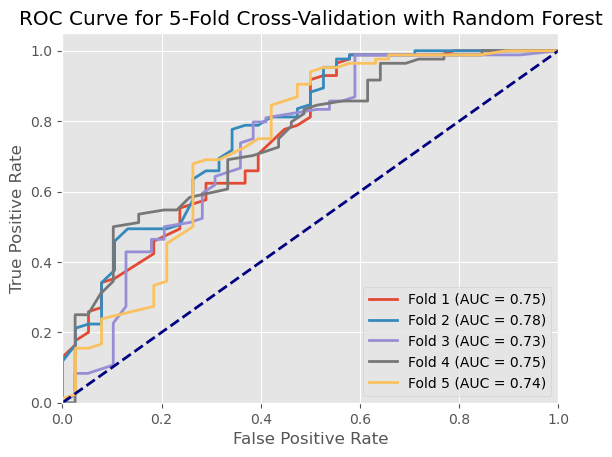

In [95]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Initialize StratifiedKFold with 5 splits
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store fpr, tpr, and roc_auc for each fold
fpr_list = []
tpr_list = []
roc_auc_list = []

# Iterate over each fold
for fold_idx, (train_index, test_index) in enumerate(kf.split(X, y), 1):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize Random Forest classifier
    random_forest = RandomForestClassifier()
    
    # Train the Random Forest model
    random_forest.fit(x_train_fold, y_train_fold)
    
    # Make predictions on the test set
    probs_fold = random_forest.predict_proba(x_test_fold)
    fpr_fold, tpr_fold, _ = roc_curve(y_test_fold, probs_fold[:, 1])
    roc_auc_fold = auc(fpr_fold, tpr_fold)
    
    # Append fpr, tpr, roc_auc to lists
    fpr_list.append(fpr_fold)
    tpr_list.append(tpr_fold)
    roc_auc_list.append(roc_auc_fold)
    
    # Plot ROC curve for the current fold
    plt.plot(fpr_fold, tpr_fold, lw=2, label=f'Fold {fold_idx} (AUC = {roc_auc_fold:.2f})')

# Plot ROC curve for each fold
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for 5-Fold Cross-Validation with Random Forest')
plt.legend(loc="lower right")
plt.show()


# Hyper Parameter tuning for random forest

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest model
random_forest = RandomForestClassifier()

# Initialize StratifiedKFold with 5 splits
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=kf, scoring='accuracy')

# Perform hyperparameter tuning
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = RandomForestClassifier(**best_params)
best_model.fit(X, y)

# Make predictions
predicted_values = best_model.predict(X)

# Generate a classification report
report = classification_report(y, predicted_values)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Print the classification report
print("\nClassification Report:\n", report)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.47      0.62       192
           1       0.80      0.98      0.88       422

    accuracy                           0.82       614
   macro avg       0.87      0.73      0.75       614
weighted avg       0.84      0.82      0.80       614



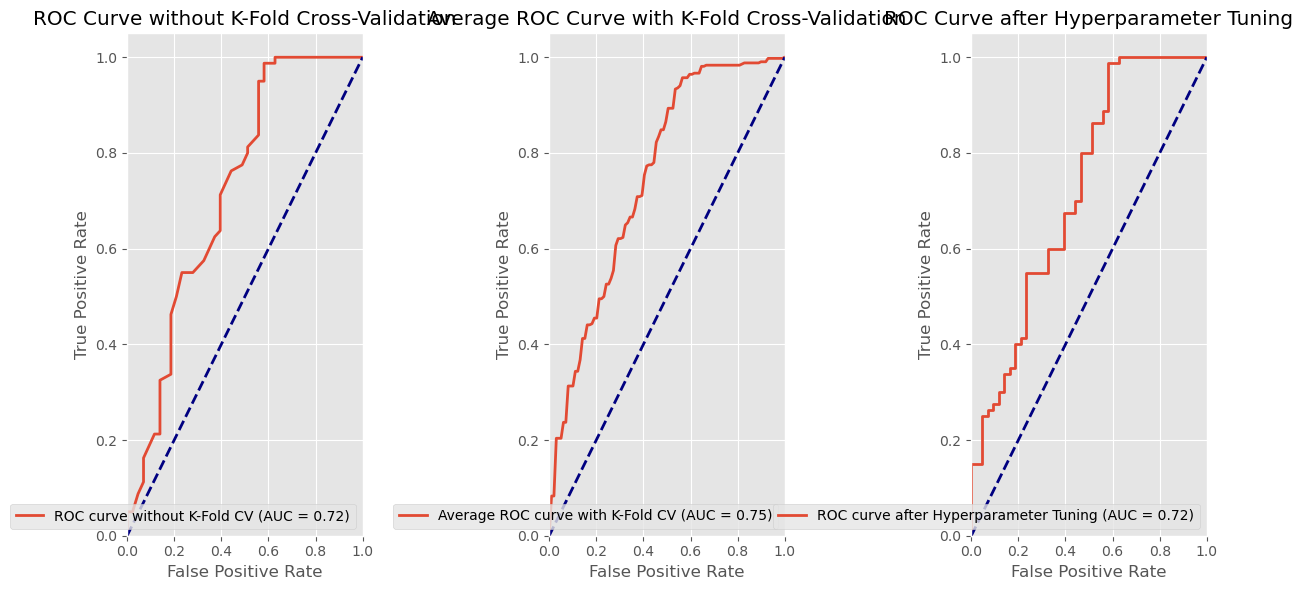

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Train Random Forest without k-fold cross-validation
random_forest_no_cv = RandomForestClassifier()
random_forest_no_cv.fit(x_train, y_train)

# Make predictions on the test set without k-fold cross-validation
predicted_values_rf_no_cv = random_forest_no_cv.predict_proba(x_test)[:, 1]

# Generate ROC curve without k-fold cross-validation
fpr_rf_no_cv, tpr_rf_no_cv, _ = roc_curve(y_test, predicted_values_rf_no_cv)
roc_auc_rf_no_cv = auc(fpr_rf_no_cv, tpr_rf_no_cv)

# Train Random Forest with k-fold cross-validation and hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
random_forest_cv = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=random_forest_cv, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search_rf.fit(X, y)

# Get the best estimator and its hyperparameters
best_rf_cv = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_

# Train Random Forest with the best hyperparameters
best_rf_cv.fit(x_train, y_train)

# Make predictions on the test set with the best hyperparameters
predicted_values_rf_tuned = best_rf_cv.predict_proba(x_test)[:, 1]

# Generate ROC curve after hyperparameter tuning
fpr_rf_tuned, tpr_rf_tuned, _ = roc_curve(y_test, predicted_values_rf_tuned)
roc_auc_rf_tuned = auc(fpr_rf_tuned, tpr_rf_tuned)

# Initialize StratifiedKFold with 5 splits
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store fpr, tpr for each fold
fpr_list_rf = []
tpr_list_rf = []

# Iterate over each fold
for train_index, test_index in kf.split(X, y):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    # Train the Random Forest model
    best_rf_cv.fit(x_train_fold, y_train_fold)
    
    # Make predictions on the test set
    predicted_values_rf = best_rf_cv.predict_proba(x_test_fold)[:, 1]
    
    # Generate ROC curve
    fpr_fold, tpr_fold, _ = roc_curve(y_test_fold, predicted_values_rf)
    
    # Append fpr, tpr to lists
    fpr_list_rf.append(fpr_fold)
    tpr_list_rf.append(tpr_fold)

# Calculate mean false positive rate (mean_fpr) across all folds
mean_fpr_rf = np.linspace(0, 1, 100)
mean_tpr_rf = np.mean([np.interp(mean_fpr_rf, fpr, tpr) for fpr, tpr in zip(fpr_list_rf, tpr_list_rf)], axis=0)
mean_tpr_rf[0] = 0.0  # Make sure the ROC curve starts at (0,0)

# Calculate AUC for the average ROC curve
roc_auc_rf_cv = auc(mean_fpr_rf, mean_tpr_rf)

# Plot ROC curves
plt.figure(figsize=(12, 6))

# ROC curve without k-fold cross-validation
plt.subplot(1, 3, 1)
plt.plot(fpr_rf_no_cv, tpr_rf_no_cv, lw=2, label='ROC curve without K-Fold CV (AUC = %0.2f)' % roc_auc_rf_no_cv)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve without K-Fold Cross-Validation')
plt.legend(loc="lower right")

# Average ROC curve with k-fold cross-validation
plt.subplot(1, 3, 2)
plt.plot(mean_fpr_rf, mean_tpr_rf, lw=2, label='Average ROC curve with K-Fold CV (AUC = %0.2f)' % roc_auc_rf_cv)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Average ROC Curve with K-Fold Cross-Validation')
plt.legend(loc="lower right")

# ROC curve after hyperparameter tuning
plt.subplot(1, 3, 3)
plt.plot(fpr_rf_tuned, tpr_rf_tuned, lw=2, label='ROC curve after Hyperparameter Tuning (AUC = %0.2f)' % roc_auc_rf_tuned)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve after Hyperparameter Tuning')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


# Comparing Both ROC of Random Forest

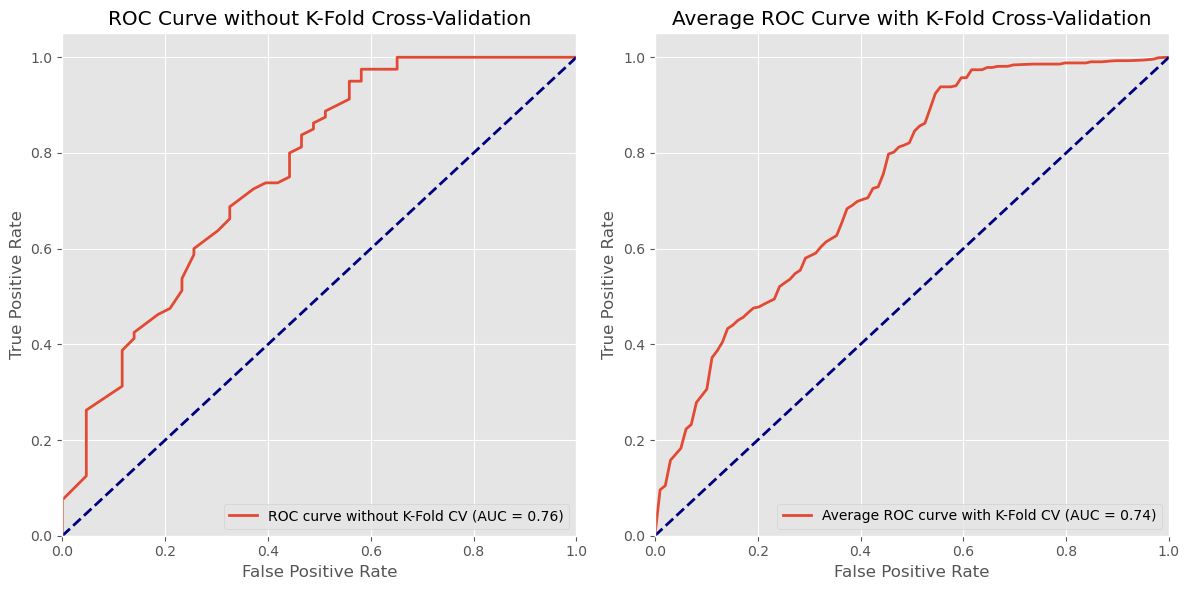

In [98]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier without k-fold cross-validation
random_forest_no_cv = RandomForestClassifier()

# Train the Random Forest model without k-fold cross-validation
random_forest_no_cv.fit(x_train, y_train)

# Make predictions on the test set without k-fold cross-validation
predicted_values_rf_no_cv = random_forest_no_cv.predict_proba(x_test)[:, 1]

# Generate ROC curve without k-fold cross-validation
fpr_rf_no_cv, tpr_rf_no_cv, _ = roc_curve(y_test, predicted_values_rf_no_cv)
roc_auc_rf_no_cv = auc(fpr_rf_no_cv, tpr_rf_no_cv)

# Initialize Random Forest classifier with k-fold cross-validation
random_forest_cv = RandomForestClassifier()

# Train the Random Forest model with k-fold cross-validation
random_forest_cv.fit(X, y)

# Initialize StratifiedKFold with 5 splits
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store fpr, tpr for each fold
fpr_list_rf = []
tpr_list_rf = []

# Iterate over each fold
for train_index, test_index in kf.split(X, y):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    # Train the Random Forest model
    random_forest_cv.fit(x_train_fold, y_train_fold)
    
    # Make predictions on the test set
    predicted_values_rf = random_forest_cv.predict_proba(x_test_fold)[:, 1]
    
    # Generate ROC curve
    fpr_fold, tpr_fold, _ = roc_curve(y_test_fold, predicted_values_rf)
    
    # Append fpr, tpr to lists
    fpr_list_rf.append(fpr_fold)
    tpr_list_rf.append(tpr_fold)

# Calculate mean false positive rate (mean_fpr) across all folds
mean_fpr_rf = np.linspace(0, 1, 100)
mean_tpr_rf = np.mean([np.interp(mean_fpr_rf, fpr, tpr) for fpr, tpr in zip(fpr_list_rf, tpr_list_rf)], axis=0)
mean_tpr_rf[0] = 0.0  # Make sure the ROC curve starts at (0,0)

# Calculate AUC for the average ROC curve
roc_auc_rf_cv = auc(mean_fpr_rf, mean_tpr_rf)

# Plot ROC curves
plt.figure(figsize=(12, 6))

# ROC curve without k-fold cross-validation
plt.subplot(1, 2, 1)
plt.plot(fpr_rf_no_cv, tpr_rf_no_cv, lw=2, label='ROC curve without K-Fold CV (AUC = %0.2f)' % roc_auc_rf_no_cv)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve without K-Fold Cross-Validation')
plt.legend(loc="lower right")

# Average ROC curve with k-fold cross-validation
plt.subplot(1, 2, 2)
plt.plot(mean_fpr_rf, mean_tpr_rf, lw=2, label='Average ROC curve with K-Fold CV (AUC = %0.2f)' % roc_auc_rf_cv)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Average ROC Curve with K-Fold Cross-Validation')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [99]:
from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3, random_state=1)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

# Kfold Classification Report for Naive Bayes

In [100]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

# Initialize StratifiedKFold with 5 splits
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over each fold
for i, (train_index, test_index) in enumerate(kf.split(X, y), 1):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize Gaussian Naive Bayes Classifier
    naive_bayes = GaussianNB()
    
    # Train the Naive Bayes model
    naive_bayes.fit(x_train, y_train)
    
    # Make predictions on the test set
    predicted_values_nb = naive_bayes.predict(x_test)
    
    # Generate and print the classification report for the current fold
    print(f"\nNaive Bayes Classification Report for Fold {i}:\n")
    print(classification_report(y_test, predicted_values_nb, target_names=["0", "1"]))
    print("="*50)



Naive Bayes Classification Report for Fold 1:

              precision    recall  f1-score   support

           0       0.81      0.45      0.58        38
           1       0.79      0.95      0.87        85

    accuracy                           0.80       123
   macro avg       0.80      0.70      0.72       123
weighted avg       0.80      0.80      0.78       123


Naive Bayes Classification Report for Fold 2:

              precision    recall  f1-score   support

           0       0.82      0.47      0.60        38
           1       0.80      0.95      0.87        85

    accuracy                           0.80       123
   macro avg       0.81      0.71      0.74       123
weighted avg       0.81      0.80      0.79       123


Naive Bayes Classification Report for Fold 3:

              precision    recall  f1-score   support

           0       0.82      0.46      0.59        39
           1       0.79      0.95      0.86        84

    accuracy                          

In [101]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Initialize lists to store evaluation metrics
accuracy_list = []
precision_list_0 = []
precision_list_1 = []
recall_list_0 = []
recall_list_1 = []
f1_list_0 = []
f1_list_1 = []

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# Iterate over each fold
for train_index, test_index in kf.split(X, y):
    x_train, x_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Initialize Gaussian Naive Bayes Classifier
    naive_bayes = GaussianNB()
    
    # Train the Naive Bayes model
    naive_bayes.fit(x_train, y_train)
    
    # Make predictions on the test set
    predicted_values_nb = naive_bayes.predict(x_test)
    
    # Calculate evaluation metrics for class 0
    precision_0 = precision_score(y_test, predicted_values_nb, pos_label=0)
    recall_0 = recall_score(y_test, predicted_values_nb, pos_label=0)
    f1_0 = f1_score(y_test, predicted_values_nb, pos_label=0)
    
    # Calculate evaluation metrics for class 1
    precision_1 = precision_score(y_test, predicted_values_nb, pos_label=1)
    recall_1 = recall_score(y_test, predicted_values_nb, pos_label=1)
    f1_1 = f1_score(y_test, predicted_values_nb, pos_label=1)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predicted_values_nb)
    
    # Append metrics to the lists
    precision_list_0.append(precision_0)
    recall_list_0.append(recall_0)
    f1_list_0.append(f1_0)
    precision_list_1.append(precision_1)
    recall_list_1.append(recall_1)
    f1_list_1.append(f1_1)
    accuracy_list.append(accuracy)

# Calculate mean values
mean_accuracy = np.mean(accuracy_list)
mean_precision_0 = np.mean(precision_list_0)
mean_recall_0 = np.mean(recall_list_0)
mean_f1_0 = np.mean(f1_list_0)
mean_precision_1 = np.mean(precision_list_1)
mean_recall_1 = np.mean(recall_list_1)
mean_f1_1 = np.mean(f1_list_1)

# Print mean values
print("Naive Bayes Classifier")
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision for class 0:", mean_precision_0)
print("Mean Recall for class 0:", mean_recall_0)
print("Mean F1 Score for class 0:", mean_f1_0)
print("Mean Precision for class 1:", mean_precision_1)
print("Mean Recall for class 1:", mean_recall_1)
print("Mean F1 Score for class 1:", mean_f1_1)


Naive Bayes Classifier
Mean Accuracy: 0.7915233906437426
Mean Precision for class 0: 0.7911304347826087
Mean Recall for class 0: 0.4585695006747638
Mean F1 Score for class 0: 0.5795257517170753
Mean Precision for class 1: 0.7927697885862199
Mean Recall for class 1: 0.9430532212885154
Mean F1 Score for class 1: 0.8613271182629372


# ROC curve for Naive Bayes

Specificity: 0.4186046511627907
Sensitivity: 0.975
PPV: 0.7572815533980582
NPV: 0.9
ROC AUC: 0.752906976744186


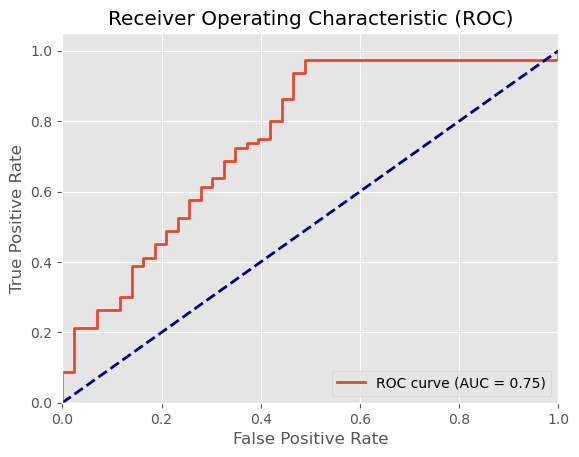

In [102]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the Naive Bayes model
naive_bayes.fit(x_train, y_train)

# Make predictions on the test set
predicted_values_nb = naive_bayes.predict(x_test)

# Generate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predicted_values_nb).ravel()

# Calculate specificity, sensitivity, ppv, npv
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
ppv = tp / (tp + fp)
npv = tn / (tn + fn)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, naive_bayes.predict_proba(x_test)[:,1])
roc_auc = auc(fpr, tpr)

# Print the metrics
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("PPV:", ppv)
print("NPV:", npv)
print("ROC AUC:", roc_auc)

# Plot ROC curve
plt.plot(fpr, tpr, lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# ROC curve with Kfold for Naive Bayes

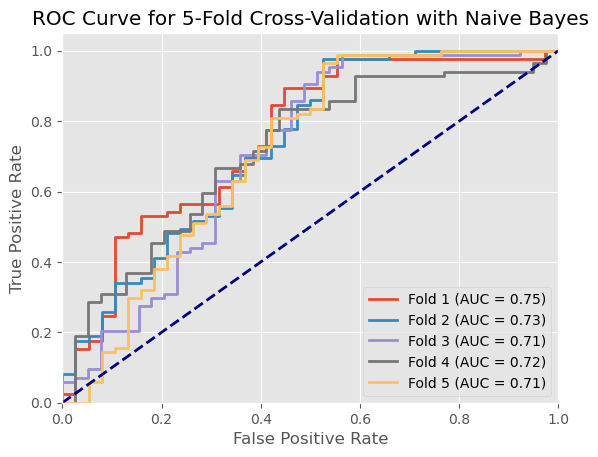

In [103]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt

# Initialize StratifiedKFold with 5 splits
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store fpr, tpr, and roc_auc for each fold
fpr_list = []
tpr_list = []
roc_auc_list = []

# Iterate over each fold
for fold_idx, (train_index, test_index) in enumerate(kf.split(X, y), 1):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize Gaussian Naive Bayes classifier
    naive_bayes = GaussianNB()
    
    # Train the Naive Bayes model
    naive_bayes.fit(x_train_fold, y_train_fold)
    
    # Make predictions on the test set
    probs_fold = naive_bayes.predict_proba(x_test_fold)
    fpr_fold, tpr_fold, _ = roc_curve(y_test_fold, probs_fold[:, 1])
    roc_auc_fold = auc(fpr_fold, tpr_fold)
    
    # Append fpr, tpr, roc_auc to lists
    fpr_list.append(fpr_fold)
    tpr_list.append(tpr_fold)
    roc_auc_list.append(roc_auc_fold)
    
    # Plot ROC curve for the current fold
    plt.plot(fpr_fold, tpr_fold, lw=2, label=f'Fold {fold_idx} (AUC = {roc_auc_fold:.2f})')

# Plot ROC curve for each fold
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for 5-Fold Cross-Validation with Naive Bayes')
plt.legend(loc="lower right")
plt.show()


# hyperparameter tuning naive bayes

In [104]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

# Define the parameter grid to search
param_grid = {
    # Naive Bayes does not have many hyperparameters to tune
    # We can leave the parameter grid empty or include options for priors
}

# Initialize Naive Bayes model (GaussianNB in this case)
naive_bayes = GaussianNB()

# Initialize StratifiedKFold with 5 splits
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=naive_bayes, param_grid=param_grid, cv=kf, scoring='accuracy')

# Perform hyperparameter tuning
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = GaussianNB(**best_params)
best_model.fit(X, y)

# Make predictions
predicted_values = best_model.predict(X)

# Generate a classification report
report = classification_report(y, predicted_values)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Print the classification report
print("\nClassification Report:\n", report)


Best Hyperparameters: {}

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.46      0.59       192
           1       0.79      0.95      0.87       422

    accuracy                           0.80       614
   macro avg       0.80      0.71      0.73       614
weighted avg       0.80      0.80      0.78       614



# Comparing ROC curve for Naive Bayes

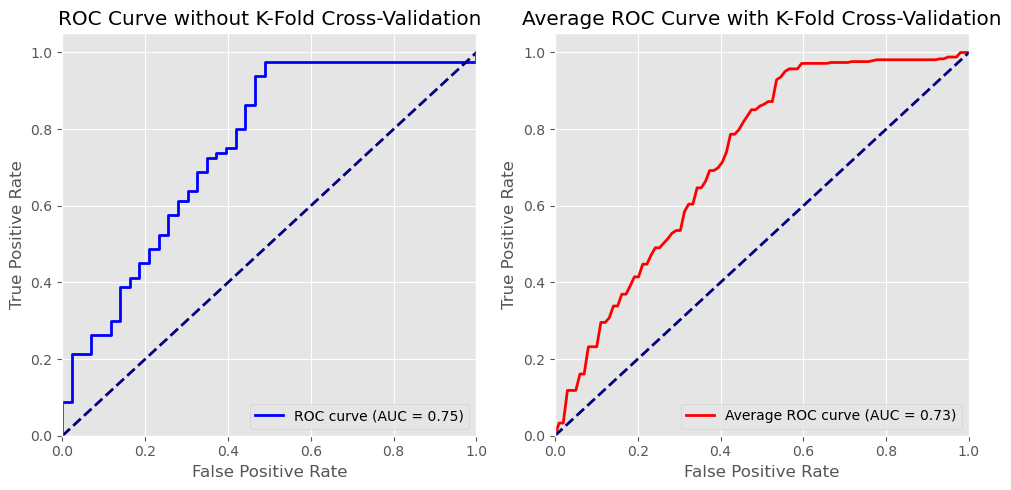

In [114]:
from sklearn.naive_bayes import GaussianNB

# Without k-fold cross-validation
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gaussian Naive Bayes Classifier
naive_bayes = GaussianNB()

# Train the Naive Bayes Classifier model
naive_bayes.fit(x_train, y_train)

# Make predictions on the test set
probs_nb = naive_bayes.predict_proba(x_test)
fpr_nb, tpr_nb, _ = roc_curve(y_test, probs_nb[:, 1])
roc_auc_nb = auc(fpr_nb, tpr_nb)

# With k-fold cross-validation
# Initialize lists to store fpr, tpr for each fold
fpr_list_nb = []
tpr_list_nb = []

# Iterate over each fold
for train_index, test_index in kf.split(X, y):
    x_train_fold, x_test_fold = X.loc[train_index], X.loc[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    # Initialize Gaussian Naive Bayes Classifier
    naive_bayes_fold = GaussianNB()
    
    # Train the Naive Bayes Classifier model
    naive_bayes_fold.fit(x_train_fold, y_train_fold)
    
    # Make predictions on the test set
    probs_fold_nb = naive_bayes_fold.predict_proba(x_test_fold)
    fpr_fold_nb, tpr_fold_nb, _ = roc_curve(y_test_fold, probs_fold_nb[:, 1])
    # Define mean false positive rate (mean_fpr)
    mean_fpr = np.linspace(0, 1, 100)

    # Interpolate ROC curve to have the same number of points
    tpr_interp_nb = np.interp(mean_fpr, fpr_fold_nb, tpr_fold_nb)
    tpr_interp_nb[0] = 0.0  # Make sure the ROC curve starts at (0,0)
    
    # Append fpr, tpr to lists
    fpr_list_nb.append(fpr_fold_nb)
    tpr_list_nb.append(tpr_interp_nb)

# Calculate average fpr, tpr across all folds
mean_tpr_nb = np.mean(tpr_list_nb, axis=0)

# Calculate AUC for the average ROC curve
roc_auc_mean_nb = auc(mean_fpr, mean_tpr_nb)

# Plot ROC curves
plt.figure(figsize=(10, 5))

# ROC curve without k-fold cross-validation
plt.subplot(1, 2, 1)
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve without K-Fold Cross-Validation')
plt.legend(loc="lower right")

# Average ROC curve with k-fold cross-validation
plt.subplot(1, 2, 2)
plt.plot(mean_fpr, mean_tpr_nb, color='red', lw=2, label='Average ROC curve (AUC = %0.2f)' % roc_auc_mean_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Average ROC Curve with K-Fold Cross-Validation')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


# Kfold Classification Report for KNN

In [106]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Initialize StratifiedKFold with 5 splits
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize an empty list to store accuracy values for each fold
accuracy_values = []

# Iterate over each fold
for i, (train_index, test_index) in enumerate(kf.split(X, y), 1):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize KNeighborsClassifier
    knn = KNeighborsClassifier()
    
    # Train the KNeighborsClassifier model
    knn.fit(x_train, y_train)
    
    # Make predictions on the test set
    predicted_values_knn = knn.predict(x_test)
    
    # Calculate accuracy for the current fold
    accuracy = accuracy_score(y_test, predicted_values_knn)
    
    # Append accuracy to the list
    accuracy_values.append(accuracy)

    # Generate and print the classification report for the current fold
    print(f"\nKNN Classification Report for Fold {i}:\n")
    print(classification_report(y_test, predicted_values_knn, target_names=["0", "1"]))
    print("="*50)

# Calculate the average accuracy across all folds
average_accuracy = sum(accuracy_values) / len(accuracy_values)

# Print the average accuracy
print("\nAverage Accuracy across all Folds:", average_accuracy)



KNN Classification Report for Fold 1:

              precision    recall  f1-score   support

           0       0.39      0.24      0.30        38
           1       0.71      0.84      0.77        85

    accuracy                           0.65       123
   macro avg       0.55      0.54      0.53       123
weighted avg       0.61      0.65      0.62       123


KNN Classification Report for Fold 2:

              precision    recall  f1-score   support

           0       0.36      0.24      0.29        38
           1       0.70      0.81      0.75        85

    accuracy                           0.63       123
   macro avg       0.53      0.52      0.52       123
weighted avg       0.60      0.63      0.61       123


KNN Classification Report for Fold 3:

              precision    recall  f1-score   support

           0       0.33      0.08      0.12        39
           1       0.68      0.93      0.79        84

    accuracy                           0.66       123
   macro

In [107]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Initialize lists to store evaluation metrics
accuracy_list = []
precision_list_0 = []
precision_list_1 = []
recall_list_0 = []
recall_list_1 = []
f1_list_0 = []
f1_list_1 = []

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# Iterate over each fold
for train_index, test_index in kf.split(X, y):
    x_train, x_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Initialize KNeighborsClassifier
    knn_classifier = KNeighborsClassifier()
    
    # Train the KNeighborsClassifier model
    knn_classifier.fit(x_train, y_train)
    
    # Make predictions on the test set
    predicted_values_knn = knn_classifier.predict(x_test)
    
    # Calculate evaluation metrics for class 0
    precision_0 = precision_score(y_test, predicted_values_knn, pos_label=0)
    recall_0 = recall_score(y_test, predicted_values_knn, pos_label=0)
    f1_0 = f1_score(y_test, predicted_values_knn, pos_label=0)
    
    # Calculate evaluation metrics for class 1
    precision_1 = precision_score(y_test, predicted_values_knn, pos_label=1)
    recall_1 = recall_score(y_test, predicted_values_knn, pos_label=1)
    f1_1 = f1_score(y_test, predicted_values_knn, pos_label=1)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predicted_values_knn)
    
    # Append metrics to the lists
    precision_list_0.append(precision_0)
    recall_list_0.append(recall_0)
    f1_list_0.append(f1_0)
    precision_list_1.append(precision_1)
    recall_list_1.append(recall_1)
    f1_list_1.append(f1_1)
    accuracy_list.append(accuracy)

# Calculate mean values
mean_accuracy = np.mean(accuracy_list)
mean_precision_0 = np.mean(precision_list_0)
mean_recall_0 = np.mean(recall_list_0)
mean_f1_0 = np.mean(f1_list_0)
mean_precision_1 = np.mean(precision_list_1)
mean_recall_1 = np.mean(recall_list_1)
mean_f1_1 = np.mean(f1_list_1)

# Print mean values
print("K-Nearest Neighbors (KNN) Classifier")
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision for class 0:", mean_precision_0)
print("Mean Recall for class 0:", mean_recall_0)
print("Mean F1 Score for class 0:", mean_f1_0)
print("Mean Precision for class 1:", mean_precision_1)
print("Mean Recall for class 1:", mean_recall_1)
print("Mean F1 Score for class 1:", mean_f1_1)


K-Nearest Neighbors (KNN) Classifier
Mean Accuracy: 0.607437025189924
Mean Precision for class 0: 0.2983695270222785
Mean Recall for class 0: 0.19257759784075573
Mean F1 Score for class 0: 0.2315267635827695
Mean Precision for class 1: 0.6843821731781622
Mean Recall for class 1: 0.7961904761904762
Mean F1 Score for class 1: 0.7355301902144413


# ROC Curve for KNN

Specificity: 0.09302325581395349
Sensitivity: 0.8375
PPV: 0.6320754716981132
NPV: 0.23529411764705882
ROC AUC: 0.545639534883721


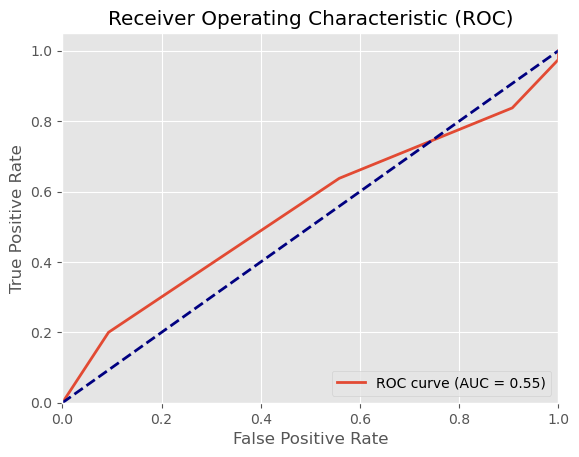

In [108]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Train the KNN model
knn.fit(x_train, y_train)

# Make predictions on the test set
predicted_values_knn = knn.predict(x_test)

# Generate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predicted_values_knn).ravel()

# Calculate specificity, sensitivity, ppv, npv
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
ppv = tp / (tp + fp)
npv = tn / (tn + fn)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(x_test)[:,1])
roc_auc = auc(fpr, tpr)

# Print the metrics
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("PPV:", ppv)
print("NPV:", npv)
print("ROC AUC:", roc_auc)

# Plot ROC curve
plt.plot(fpr, tpr, lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# ROC Curve with Kfold for KNN

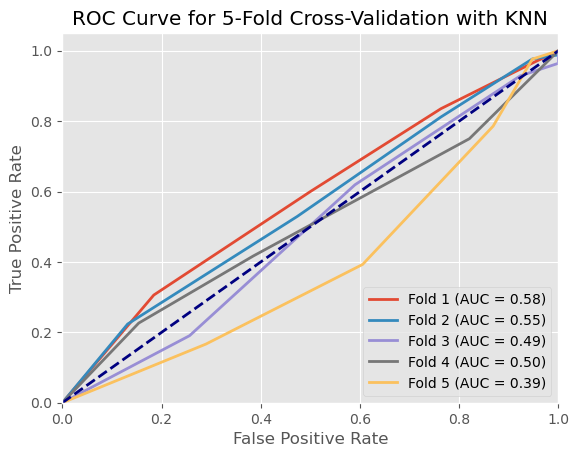

In [109]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Initialize StratifiedKFold with 5 splits
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store fpr, tpr, and roc_auc for each fold
fpr_list = []
tpr_list = []
roc_auc_list = []

# Iterate over each fold
for fold_idx, (train_index, test_index) in enumerate(kf.split(X, y), 1):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize KNN classifier
    knn = KNeighborsClassifier()
    
    # Train the KNN model
    knn.fit(x_train_fold, y_train_fold)
    
    # Make predictions on the test set
    probs_fold = knn.predict_proba(x_test_fold)
    fpr_fold, tpr_fold, _ = roc_curve(y_test_fold, probs_fold[:, 1])
    roc_auc_fold = auc(fpr_fold, tpr_fold)
    
    # Append fpr, tpr, roc_auc to lists
    fpr_list.append(fpr_fold)
    tpr_list.append(tpr_fold)
    roc_auc_list.append(roc_auc_fold)
    
    # Plot ROC curve for the current fold
    plt.plot(fpr_fold, tpr_fold, lw=2, label=f'Fold {fold_idx} (AUC = {roc_auc_fold:.2f})')

# Plot ROC curve for each fold
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for 5-Fold Cross-Validation with KNN')
plt.legend(loc="lower right")
plt.show()


# Comparing ROC curve for KNN

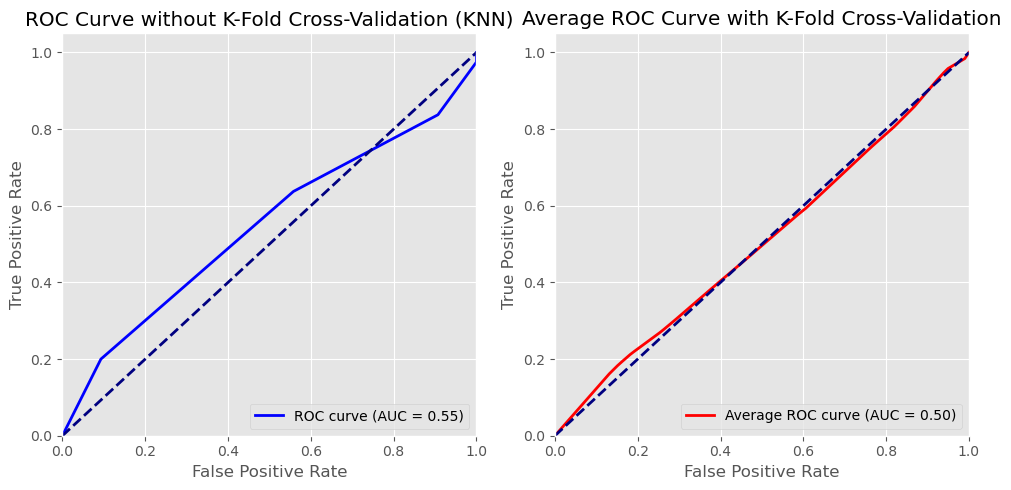

In [112]:
from sklearn.neighbors import KNeighborsClassifier

# Without k-fold cross-validation
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN Classifier
knn = KNeighborsClassifier()

# Train the KNN Classifier model
knn.fit(x_train, y_train)

# Make predictions on the test set
probs_knn = knn.predict_proba(x_test)
fpr_knn, tpr_knn, _ = roc_curve(y_test, probs_knn[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

# With k-fold cross-validation
# Initialize lists to store fpr, tpr for each fold
fpr_list_knn = []
tpr_list_knn = []

# Iterate over each fold
for train_index, test_index in kf.split(X, y):
    x_train_fold, x_test_fold = X.loc[train_index], X.loc[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    # Initialize KNN Classifier
    knn_fold = KNeighborsClassifier()
    
    # Train the KNN Classifier model
    knn_fold.fit(x_train_fold, y_train_fold)
    
    # Make predictions on the test set
    probs_fold_knn = knn_fold.predict_proba(x_test_fold)
    fpr_fold_knn, tpr_fold_knn, _ = roc_curve(y_test_fold, probs_fold_knn[:, 1])
    # Define mean false positive rate (mean_fpr)
    mean_fpr = np.linspace(0, 1, 100)

    # Interpolate ROC curve to have the same number of points
    tpr_interp_knn = np.interp(mean_fpr, fpr_fold_knn, tpr_fold_knn)
    tpr_interp_knn[0] = 0.0  # Make sure the ROC curve starts at (0,0)
    
    # Append fpr, tpr to lists
    fpr_list_knn.append(fpr_fold_knn)
    tpr_list_knn.append(tpr_interp_knn)

# Calculate average fpr, tpr across all folds
mean_tpr_knn = np.mean(tpr_list_knn, axis=0)

# Calculate AUC for the average ROC curve
roc_auc_mean_knn = auc(mean_fpr, mean_tpr_knn)

# Plot ROC curves
plt.figure(figsize=(10, 5))

# ROC curve without k-fold cross-validation
plt.subplot(1, 2, 1)
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve without K-Fold Cross-Validation (KNN)')
plt.legend(loc="lower right")

# Average ROC curve with k-fold cross-validation
plt.subplot(1, 2, 2)
plt.plot(mean_fpr, mean_tpr_knn, color='red', lw=2, label='Average ROC curve (AUC = %0.2f)' % roc_auc_mean_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Average ROC Curve with K-Fold Cross-Validation')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


In [115]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

# Define your dictionary containing model names and their corresponding models
models = {
    "Model1": model1,
    "Model2": model2,
    "Model3": model3,
    "Model4": model4,
    "Model5": model5
    # Add more models as needed
}

# Define a dictionary to store model names and their cross-validation scores
model_scores = {}

# Define a custom scorer for accuracy
scorer = make_scorer(accuracy_score)

# Iterate over each model
for name, model in models.items():
    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=5, scoring=scorer)
    
    # Store the model name and its cross-validation scores
    model_scores[name] = scores

# Print the cross-validation scores for each model
for name, scores in model_scores.items():
    print(f"Cross-Validation Scores for {name}: {scores}")
    print(f"Average Accuracy for {name}: {scores.mean()}\n")


Cross-Validation Scores for Model1: [0.80487805 0.76422764 0.7804878  0.84552846 0.80327869]
Average Accuracy for Model1: 0.7996801279488205

Cross-Validation Scores for Model2: [0.7398374  0.69918699 0.69105691 0.79674797 0.72131148]
Average Accuracy for Model2: 0.7296281487405037

Cross-Validation Scores for Model3: [0.78861789 0.72357724 0.76422764 0.82113821 0.79508197]
Average Accuracy for Model3: 0.7785285885645742

Cross-Validation Scores for Model4: [0.6504065  0.57723577 0.6097561  0.52845528 0.60655738]
Average Accuracy for Model4: 0.5944822071171532

Cross-Validation Scores for Model5: [0.79674797 0.74796748 0.76422764 0.81300813 0.79508197]
Average Accuracy for Model5: 0.783406637345062



In [119]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.metrics import classification_report

# Assuming x_train, y_train, x_test, and y_test are defined and have correct shapes

# Check the shape of your data
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)

x_train_array = x_train.values

# Reshape the data to be 3D (samples, timesteps, features)
x_train_reshaped = x_train_array.reshape(x_train_array.shape[0], x_train_array.shape[1], 1)



# Define the RNN model
model = Sequential([
     SimpleRNN(64, input_shape=(x_train_reshaped.shape[1], x_train_reshaped.shape[2])),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the RNN model
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on the test set
predicted_values_rnn = model.predict(x_test)
predicted_values_rnn = np.where(predicted_values_rnn > 0.5, 1, 0)  # Convert probabilities to binary predictions

# Generate a classification report
report_rnn = classification_report(y_test, predicted_values_rnn)

# Print the classification report for RNN
print("Recurrent Neural Network Classifier:")
print(report_rnn)

x_train shape: (491, 21)
x_test shape: (123, 21)
y_train shape: (491,)
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6644 - loss: 0.6305
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6697 - loss: 0.6035
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6803 - loss: 0.6008
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7249 - loss: 0.5394
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7927 - loss: 0.4956
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7872 - loss: 0.4923
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7878 - loss: 0.4890
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7997 - loss: 0.4752
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8182 - loss: 0.4416
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8185 - loss: 0.4540
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Recurrent Neural Network Classifier:
             

# ROC Curve for Kfold in RNN

x_train shape: (491, 21)
x_test shape: (123, 21)
y_train shape: (491,)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


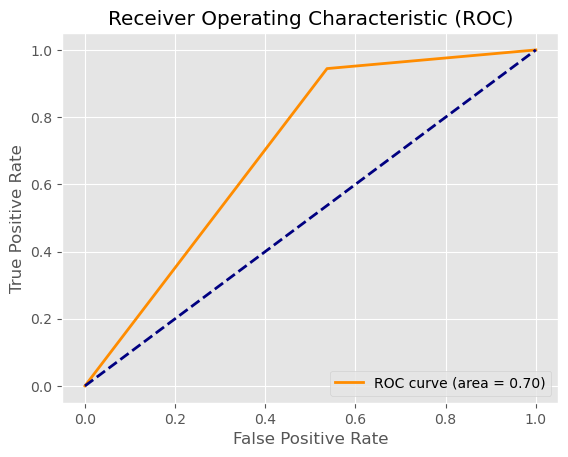

Recurrent Neural Network Classifier:
              precision    recall  f1-score   support

           0       0.78      0.46      0.58       149
           1       0.80      0.94      0.87       342

    accuracy                           0.80       491
   macro avg       0.79      0.70      0.72       491
weighted avg       0.80      0.80      0.78       491



In [124]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Assuming x_train, y_train, x_test, and y_test are defined and have correct shapes

# Check the shape of your data
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)

# Convert DataFrame to numpy array
x_train_array = x_train.values

# Reshape the data to be 3D (samples, timesteps, features)
x_train_reshaped = x_train_array.reshape(x_train_array.shape[0], x_train_array.shape[1], 1)

# Define the RNN model
def create_rnn_model():
    model = Sequential([
        SimpleRNN(64, input_shape=(x_train_reshaped.shape[1], x_train_reshaped.shape[2])),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store true and predicted values for ROC curve
true_values = []
predicted_values = []

# Perform k-fold cross-validation
for train_idx, val_idx in kfold.split(x_train_reshaped, y_train):
    # Split data into training and validation sets
    x_train_fold, x_val_fold = x_train_reshaped[train_idx], x_train_reshaped[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Create and train the model
    model = create_rnn_model()
    model.fit(x_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)
    
    # Predict on the validation set
    fold_predicted_values = model.predict(x_val_fold)
    fold_predicted_values = np.where(fold_predicted_values > 0.5, 1, 0)
    
    # Store true and predicted values for ROC curve
    true_values.extend(y_val_fold)
    predicted_values.extend(fold_predicted_values)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(true_values, predicted_values)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Generate a classification report
report_rnn = classification_report(true_values, predicted_values)

# Print the classification report for RNN
print("Recurrent Neural Network Classifier:")
print(report_rnn)


# ROC Curve without KFold For RNN

x_train shape: (491, 21)
x_test shape: (123, 21)
y_train shape: (491,)
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6752 - loss: 0.6276
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6550 - loss: 0.6342
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6709 - loss: 0.6378
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6867 - loss: 0.5935
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7112 - loss: 0.5687
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7390 - loss: 0.5404
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7902 - loss: 0.4858
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8061 - loss: 0.4697
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8008 - loss: 0.4704
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8022 - loss: 0.4642
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Recurrent Neural Network Classifier:
             

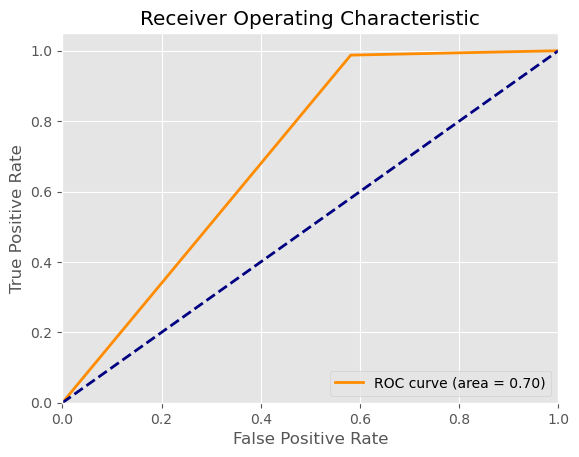

In [125]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming x_train, y_train, x_test, and y_test are defined and have correct shapes

# Check the shape of your data
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)

x_train_array = x_train.values

# Reshape the data to be 3D (samples, timesteps, features)
x_train_reshaped = x_train_array.reshape(x_train_array.shape[0], x_train_array.shape[1], 1)

# Define the RNN model
model = Sequential([
    SimpleRNN(64, input_shape=(x_train_reshaped.shape[1], x_train_reshaped.shape[2])),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the RNN model
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on the test set
predicted_values_rnn = model.predict(x_test)
predicted_values_rnn = np.where(predicted_values_rnn > 0.5, 1, 0)  # Convert probabilities to binary predictions

# Generate a classification report
report_rnn = classification_report(y_test, predicted_values_rnn)

# Print the classification report for RNN
print("Recurrent Neural Network Classifier:")
print(report_rnn)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_values_rnn)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [126]:
x_test

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
350             9083                0.0       228.0             360.0   
377             4310                0.0       130.0             360.0   
163             4167             1447.0       158.0             360.0   
609             2900                0.0        71.0             360.0   
132             2718                0.0        70.0             360.0   
..               ...                ...         ...               ...   
231             3716                0.0        42.0             180.0   
312             2507                0.0        56.0             360.0   
248             2882             1843.0       123.0             480.0   
11              2500             1840.0       109.0             360.0   
333            63337                0.0       490.0             180.0   

     Credit_History  LoanAmount_log  Gender_Female  Gender_Male  Married_No  \
350             1.0        5.429346              0            1           0   
377             1.0        4.867534              0            1           0   
163             1.0        5.062595              0            1           0   
609             1.0        4.262680              1            0           1   
132             1.0        4.248495              0            1           1   
..              ...             ...            ...          ...         ...   
231             1.0        3.737670              0            1           0   
312             1.0        4.025352              1            0           1   
248             1.0        4.812184              0            1           0   
11              1.0        4.691348              0            1           0   
333             1.0        6.194405              0            1           0   

     Married_Yes  ...  Dependents_0  Dependents_1  Dependents_2  \
350            1  ...             1             0             0   
377            1  ...             1             0             0   
163            1  ...             0             0             1   
609            0  ...             1             0             0   
132            0  ...             1             0             0   
..           ...  ...           ...           ...           ...   
231            1  ...             1             0             0   
312            0  ...             1             0             0   
248            1  ...             0             1             0   
11             1  ...             0             0             1   
333            1  ...             1             0             0   

     Education_Graduate  Education_Not Graduate  Self_Employed_No  \
350                   1                       0                 1   
377                   1                       0                 1   
163                   1                       0                 1   
609                   1                       0                 1   
132                   1                       0                 1   
..                  ...                     ...               ...   
231                   1                       0                 1   
312                   1                       0                 1   
248                   1                       0                 1   
11                    1                       0                 1   
333                   1                       0                 1   

     Self_Employed_Yes  Property_Area_Rural  Property_Area_Semiurban  \
350                  0                    0                        1   
377                  0                    0                        1   
163                  0                    1                        0   
609                  0                    1                        0   
132                  0                    0                        1   
..                 ...                  ...                      ...   
231                  0                   

In [127]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import classification_report

# Assuming x_train, y_train, x_test, and y_test are defined and have correct shapes

# Check the shape of your data
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)

x_train_array = x_train.values

# Reshape the data to be 3D (samples, timesteps, features)
x_train_reshaped = x_train_array.reshape(x_train_array.shape[0], x_train_array.shape[1], 1)

# Define the LSTM model
model = Sequential([
    LSTM(64, input_shape=(x_train_reshaped.shape[1], x_train_reshaped.shape[2])),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on the test set
predicted_values_lstm = model.predict(x_test)
predicted_values_lstm = np.where(predicted_values_lstm > 0.5, 1, 0)  # Convert probabilities to binary predictions

# Generate a classification report
report_lstm = classification_report(y_test, predicted_values_lstm)

# Print the classification report for LSTM
print("Long Short-Term Memory (LSTM) Classifier:")
print(report_lstm)


x_train shape: (491, 21)
x_test shape: (123, 21)
y_train shape: (491,)
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6445 - loss: 0.6556
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6978 - loss: 0.6113
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7112 - loss: 0.6028
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7124 - loss: 0.5996
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7025 - loss: 0.6078
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6981 - loss: 0.6087
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6783 - loss: 0.6259
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6751 - loss: 0.6301
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6881 - loss: 0.6208
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7029 - loss: 0.6027
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Long Short-Term Memory (LSTM) Classifier:
       

# ROC curve for LSTM

x_train shape: (491, 21)
x_test shape: (123, 21)
y_train shape: (491,)
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7041 - loss: 0.6473
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6727 - loss: 0.6389
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6630 - loss: 0.6420
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7164 - loss: 0.5962
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6673 - loss: 0.6378
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6909 - loss: 0.6167
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6935 - loss: 0.6162
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6992 - loss: 0.6089
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7022 - loss: 0.6082
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6651 - loss: 0.6394
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Long Short-Term Memory (LSTM) Classifier:
        

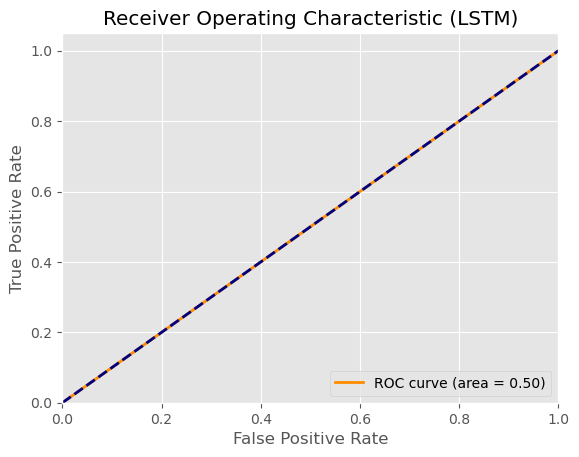

In [128]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming x_train, y_train, x_test, and y_test are defined and have correct shapes

# Check the shape of your data
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)

x_train_array = x_train.values

# Reshape the data to be 3D (samples, timesteps, features)
x_train_reshaped = x_train_array.reshape(x_train_array.shape[0], x_train_array.shape[1], 1)

# Define the LSTM model
model = Sequential([
    LSTM(64, input_shape=(x_train_reshaped.shape[1], x_train_reshaped.shape[2])),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on the test set
predicted_values_lstm = model.predict(x_test)
predicted_values_lstm = np.where(predicted_values_lstm > 0.5, 1, 0)  # Convert probabilities to binary predictions

# Generate a classification report
report_lstm = classification_report(y_test, predicted_values_lstm)

# Print the classification report for LSTM
print("Long Short-Term Memory (LSTM) Classifier:")
print(report_lstm)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_values_lstm)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (LSTM)')
plt.legend(loc="lower right")
plt.show()


# ROC Curve with Kfold in LSTM

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


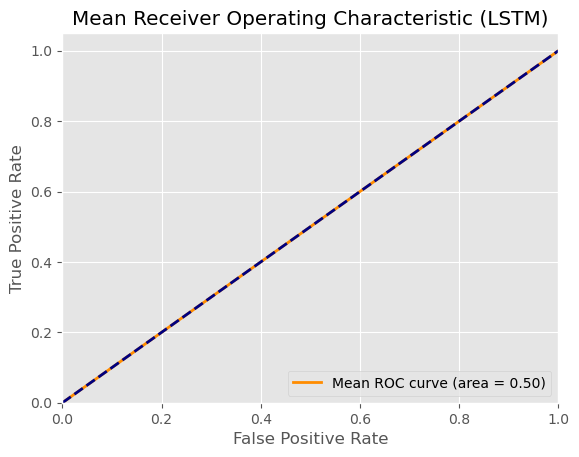

Classification Report for LSTM:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       149
           1       0.70      1.00      0.82       342

    accuracy                           0.70       491
   macro avg       0.35      0.50      0.41       491
weighted avg       0.49      0.70      0.57       491



In [130]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Define the number of folds for cross-validation
num_folds = 5

# Initialize lists to store the true and predicted labels for each fold
true_labels = []
predicted_labels = []

# Initialize lists to store fpr, tpr, and auc for each fold
fprs = []
tprs = []
aucs = []

# Define the cross-validation strategy
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Loop through each fold
for train_index, test_index in kf.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Define the LSTM model
    model = Sequential([
        LSTM(64, input_shape=(x_train_fold.shape[1], 1)),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the LSTM model
    model.fit(x_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)

    # Evaluate the model on the validation set
    predicted_values_lstm = model.predict(x_val_fold)
    predicted_values_lstm = np.where(predicted_values_lstm > 0.5, 1, 0)  # Convert probabilities to binary predictions

    # Store true and predicted labels
    true_labels.extend(y_val_fold)
    predicted_labels.extend(predicted_values_lstm)

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_val_fold, predicted_values_lstm)
    roc_auc = auc(fpr, tpr)

    # Append fpr, tpr, and auc to lists
    fprs.append(fpr)
    tprs.append(tpr)
    aucs.append(roc_auc)

# Compute mean ROC curve
mean_fpr = np.mean(fprs, axis=0)
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)

# Plot mean ROC curve
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='darkorange', lw=2, label='Mean ROC curve (area = %0.2f)' % mean_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean Receiver Operating Characteristic (LSTM)')
plt.legend(loc="lower right")
plt.show()

# Generate classification report
report_lstm = classification_report(true_labels, predicted_labels)
print("Classification Report for LSTM:")
print(report_lstm)


In [215]:
!pip install -q pyngrok

!pip install -q streamlit

!pip install -q streamlit_ace

In [216]:
%%writefile app.py
 
import pickle
import streamlit as st
 
# loading the trained model
pickle_in = open('classifier.pkl', 'rb') 
classifier = pickle.load(pickle_in)
 
@st.cache()
  
# defining the function which will make the prediction using the data which the user inputs 
def prediction(Gender, Married, ApplicantIncome, LoanAmount, Credit_History):   
 
    # Pre-processing user input    
    if Gender == "Male":
        Gender = 0
    else:
        Gender = 1
 
    if Married == "Unmarried":
        Married = 0
    else:
        Married = 1
 
    if Credit_History == "Unclear Debts":
        Credit_History = 0
    else:
        Credit_History = 1  
 
    LoanAmount = LoanAmount / 1000
 
    # Making predictions 
    prediction = classifier.predict( 
        [[Gender, Married, ApplicantIncome, LoanAmount, Credit_History]])
     
    if prediction == 0:
        pred = 'Rejected'
    else:
        pred = 'Approved'
    return pred
      
  
# this is the main function in which we define our webpage  
def main():       
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:yellow;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Streamlit Loan Prediction ML App</h1> 
    </div> 
    """
      
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True) 
      
    # following lines create boxes in which user can enter data required to make prediction 
    Gender = st.selectbox('Gender',("Male","Female"))
    Married = st.selectbox('Marital Status',("Unmarried","Married")) 
    ApplicantIncome = st.number_input("Applicants monthly income") 
    LoanAmount = st.number_input("Total loan amount")
    Credit_History = st.selectbox('Credit_History',("Unclear Debts","No Unclear Debts"))
    result =""
      
    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Predict"): 
        result = prediction(Gender, Married, ApplicantIncome, LoanAmount, Credit_History) 
        st.success('Your loan is {}'.format(result))
        print(LoanAmount)
     
if __name__=='__main__': 
    main()

Writing app.py
